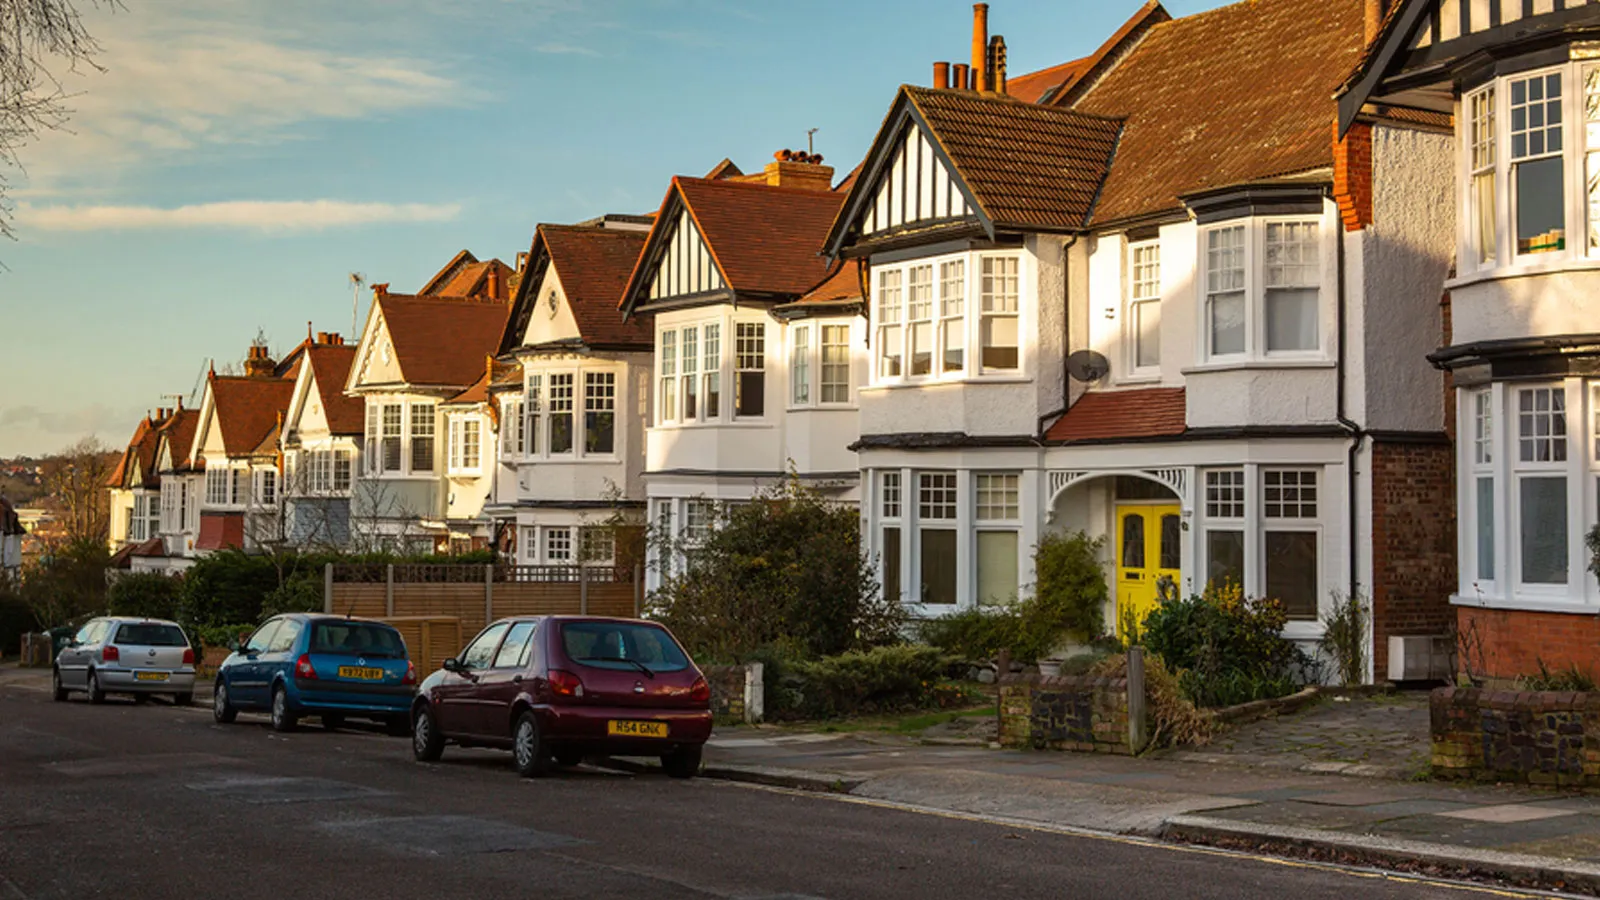

In [161]:
# Veri yükleme ve işleme için
import pandas as pd
import numpy as np
# Veri görselleştirme için
import matplotlib.pyplot as plt
import seaborn as sns
# Aykırı değerlerin tespiti ve baskılanması için
from scipy import stats
# Kategorik verilerin sayısal verilere dönüştürülmesi için
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Uyarıları bastırmak için
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


# VERİ YÜKLEME

In [162]:
df = pd.read_csv("/kaggle/input/houses-in-london/london_houses.csv")

# VERİ MANİPİLASYONU

In [163]:
def veri_tanima(dataframe, head=True):
    print("VERİ SETİ BOYUTLARI:")
    print(dataframe.shape)
    print("\nVERİ SETİ BİLGİLERİ:")
    print(dataframe.info())
    print("\nBOŞ DEĞERLER:")
    print(dataframe.isnull().sum().sort_values(ascending=True))
    print("\nBENZERSİZ DEĞERLER:")
    print(dataframe.nunique())
    print("\nTANIMLAYICI İSTATİSTİKLER:")
    display(dataframe.describe())
    if head:
        print("\nİLK 5 KAYIT:")
        display(dataframe.head())
        print("\nSON 5 KAYIT:")
        display(dataframe.tail())


In [164]:
df.to_excel('/kaggle/working/dosya_adi2.xlsx', index=False)

In [165]:
veri_tanima(df,head=True)

VERİ SETİ BOYUTLARI:
(1000, 17)

VERİ SETİ BİLGİLERİ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          1000 non-null   object
 1   Neighborhood     1000 non-null   object
 2   Bedrooms         1000 non-null   int64 
 3   Bathrooms        1000 non-null   int64 
 4   Square Meters    1000 non-null   int64 
 5   Building Age     1000 non-null   int64 
 6   Garden           1000 non-null   object
 7   Garage           1000 non-null   object
 8   Floors           1000 non-null   int64 
 9   Property Type    1000 non-null   object
 10  Heating Type     1000 non-null   object
 11  Balcony          1000 non-null   object
 12  Interior Style   1000 non-null   object
 13  View             1000 non-null   object
 14  Materials        1000 non-null   object
 15  Building Status  1000 non-null   object
 16  Price (£)        1000 non

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price (£)
count,1000.000000,1000.000000,1000.0000,1000.00000,1000.000000,1.000000e+03
mean,3.013000,2.003000,149.6270,49.96500,1.991000,1.840807e+06
std,1.393834,0.808483,58.0562,29.07086,0.821946,8.793484e+05
min,1.000000,1.000000,50.0000,1.00000,1.000000,3.866660e+05
25%,2.000000,1.000000,99.0000,24.00000,1.000000,1.161400e+06
50%,3.000000,2.000000,148.0000,50.00000,2.000000,1.721999e+06
75%,4.000000,3.000000,201.0000,76.00000,3.000000,2.390500e+06
max,5.000000,3.000000,249.0000,99.00000,3.000000,4.980000e+06



İLK 5 KAYIT:


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000



SON 5 KAYIT:


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated,1166400
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old,563333
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old,1986399
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated,1703000
999,145 Baker Street,Kensington,4,2,185,53,No,No,1,Apartment,Electric Heating,No Balcony,Modern,Street,Wood,Old,2343333


**Değişken Sınıflandırma**

In [166]:
def veristil(dataframe, cat_th=15):
    cats = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    nums = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    cats_but_nums = [col for col in dataframe.columns if dataframe[col].dtypes == "O"
                     and dataframe[col].nunique() > cat_th]
    nums_but_cats = [col for col in dataframe.columns if dataframe[col].dtypes != "O"
                     and dataframe[col].nunique() < cat_th]
    cats = cats + nums_but_cats
    cats = [col for col in cats if col not in cats_but_nums]
    nums = [col for col in nums if col not in nums_but_cats]
    return cats, nums, cats_but_nums

cats, nums, cats_but_nums = veristil(df, cat_th=15)


In [167]:
cats, nums, cats_but_nums = veristil(df,cat_th=15)

In [168]:
veristil(df,cat_th=15)

(['Neighborhood',
  'Garden',
  'Garage',
  'Property Type',
  'Heating Type',
  'Balcony',
  'Interior Style',
  'View',
  'Materials',
  'Building Status',
  'Bedrooms',
  'Bathrooms',
  'Floors'],
 ['Square Meters', 'Building Age', 'Price (£)'],
 ['Address'])

In [169]:
cats

['Neighborhood',
 'Garden',
 'Garage',
 'Property Type',
 'Heating Type',
 'Balcony',
 'Interior Style',
 'View',
 'Materials',
 'Building Status',
 'Bedrooms',
 'Bathrooms',
 'Floors']

In [170]:
nums

['Square Meters', 'Building Age', 'Price (£)']

**Veri Görselleştirme**

**HİSTOGRAM**

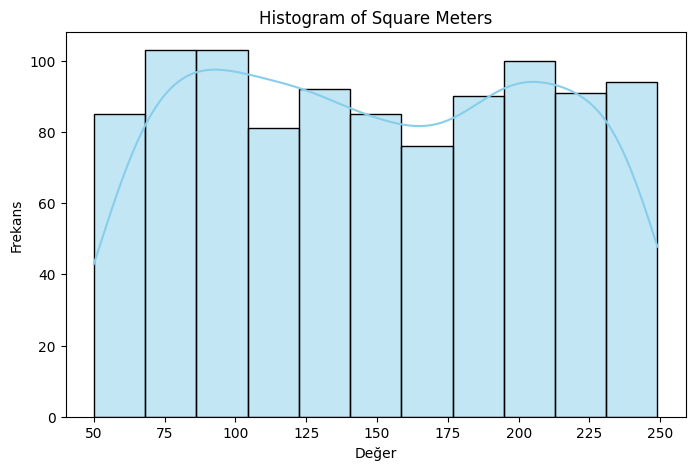

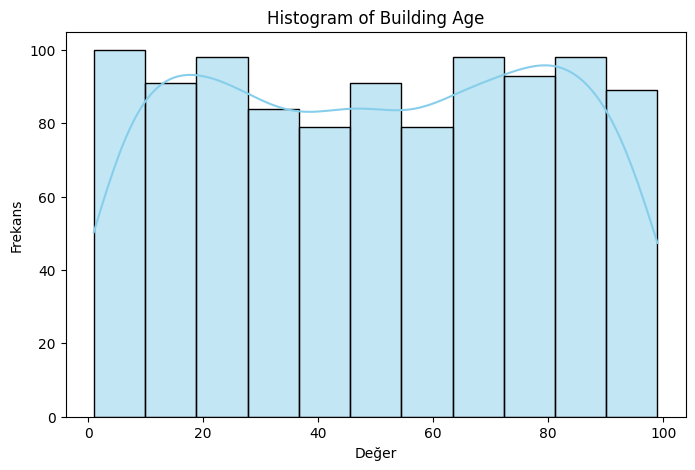

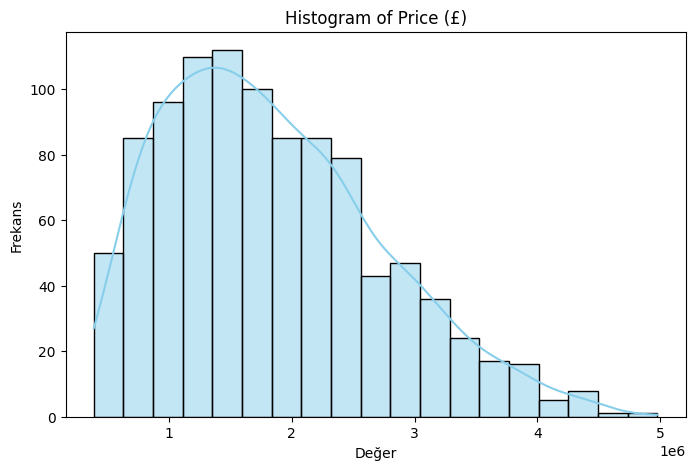

In [171]:
for col in nums:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, color='skyblue')  # Use 'col' here instead of 'nums'
    plt.title(f"Histogram of {col}")
    plt.xlabel("Değer")
    plt.ylabel("Frekans")
    plt.show()

**SCATTER PLOT**

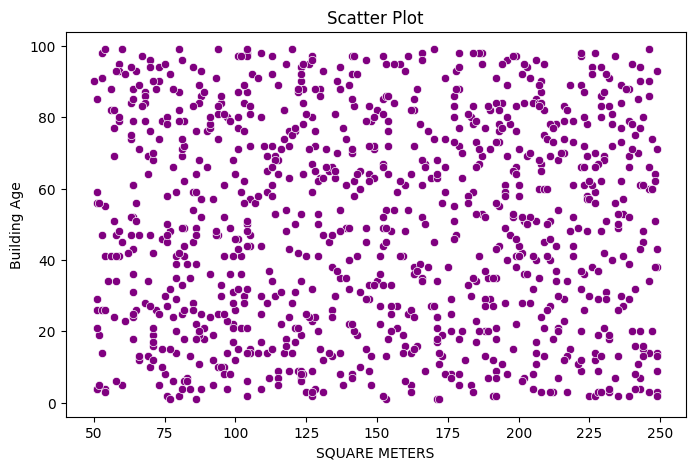

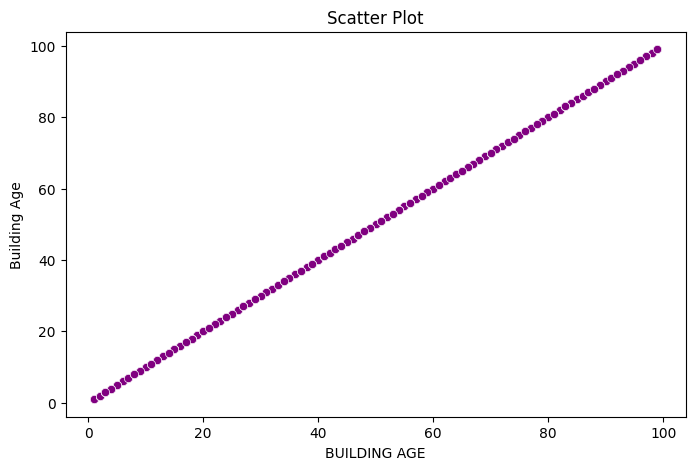

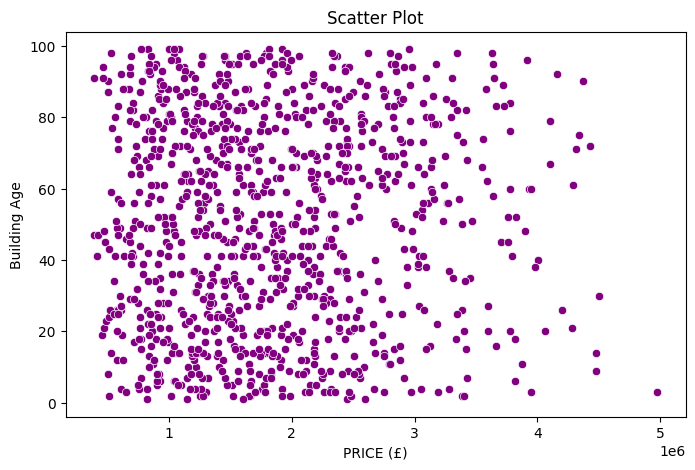

In [172]:
for col in nums:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y='Building Age', color='purple')
    plt.title("Scatter Plot")
    plt.xlabel(col.upper())
    plt.ylabel("Building Age")
    plt.show()


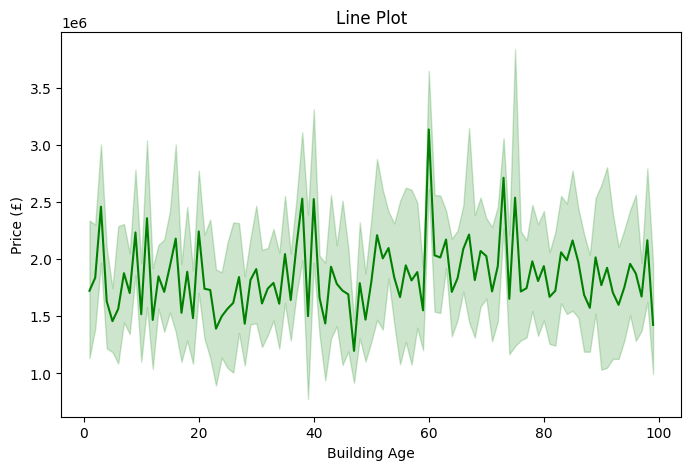

In [173]:
  plt.figure(figsize=(8, 5))
  sns.lineplot(data=df, x='Building Age', y='Price (£)', color='green')
  plt.title("Line Plot")
  plt.xlabel("Building Age")
  plt.ylabel("Price (£)")
  plt.show()


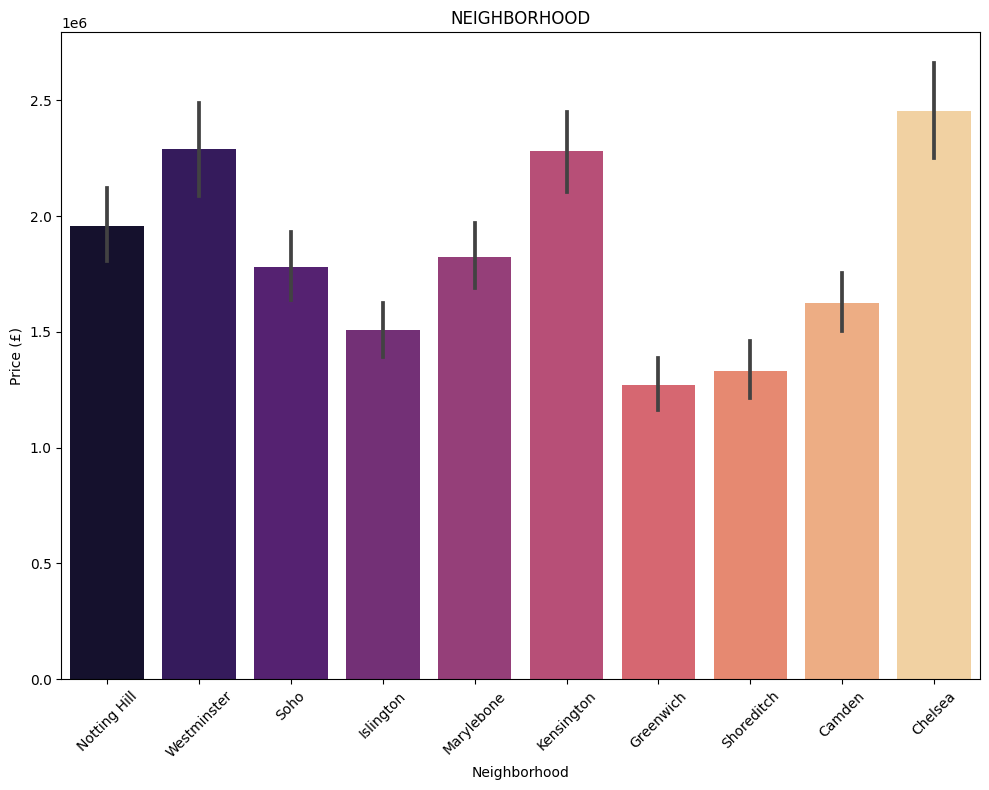

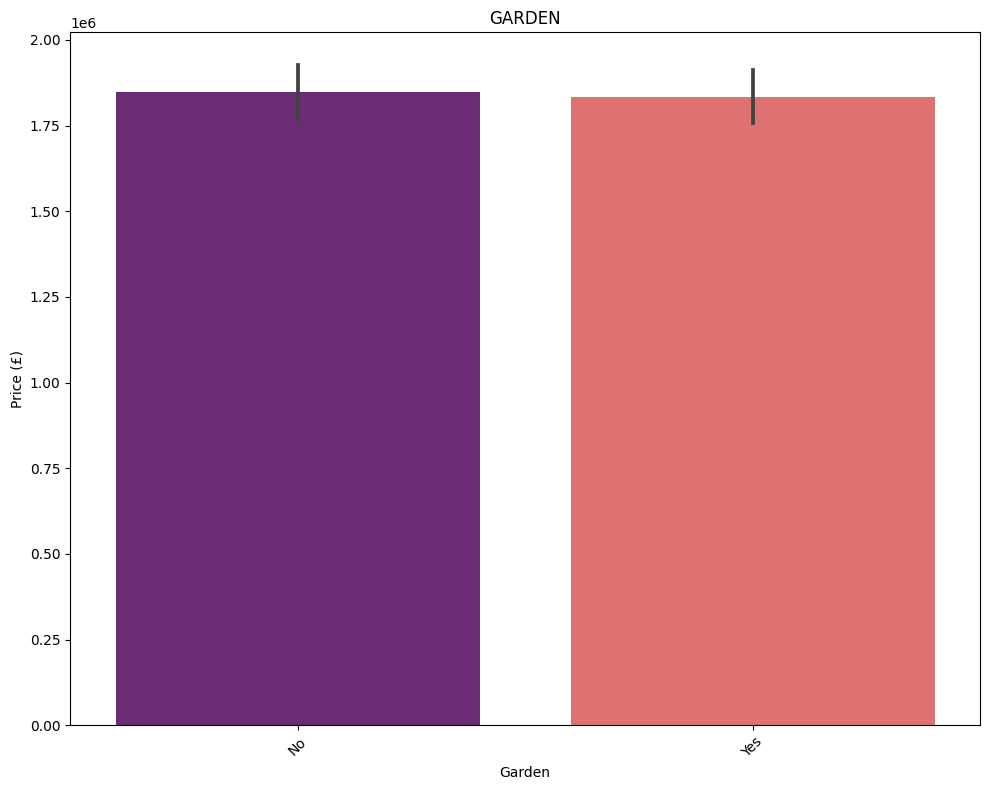

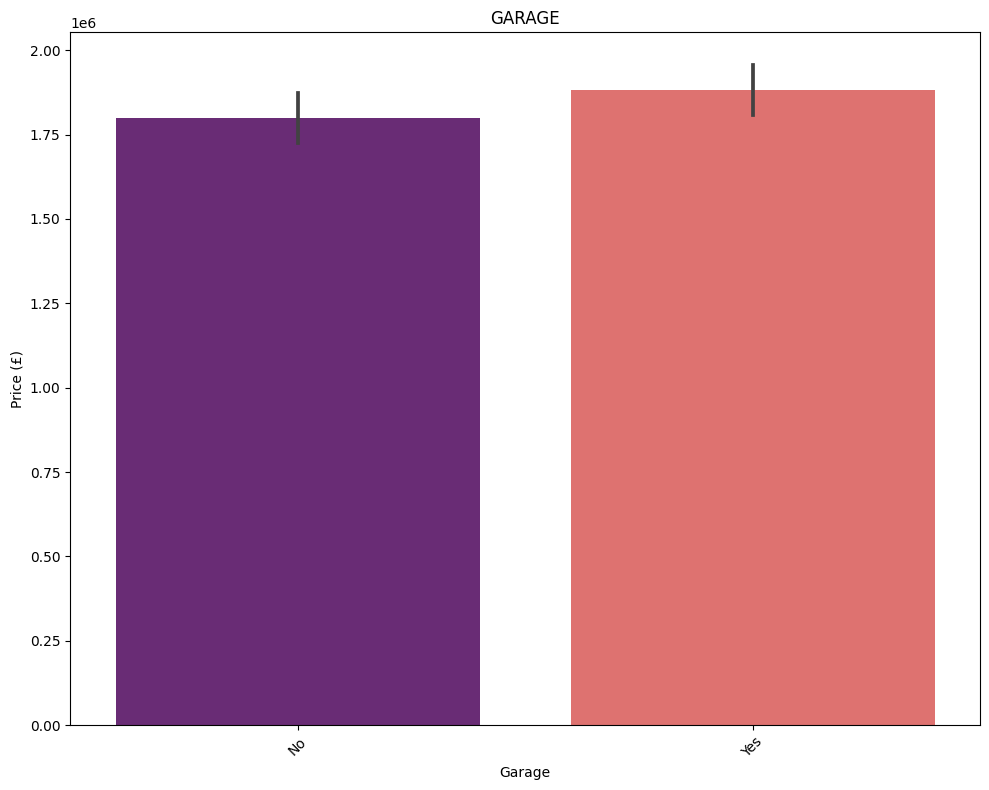

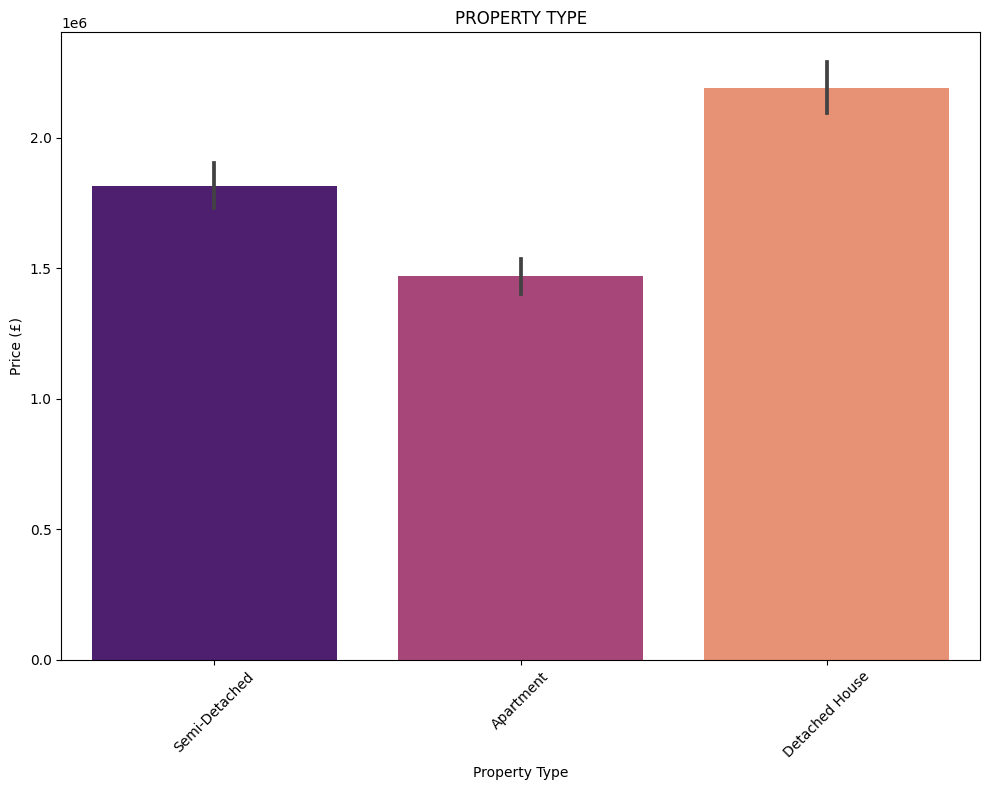

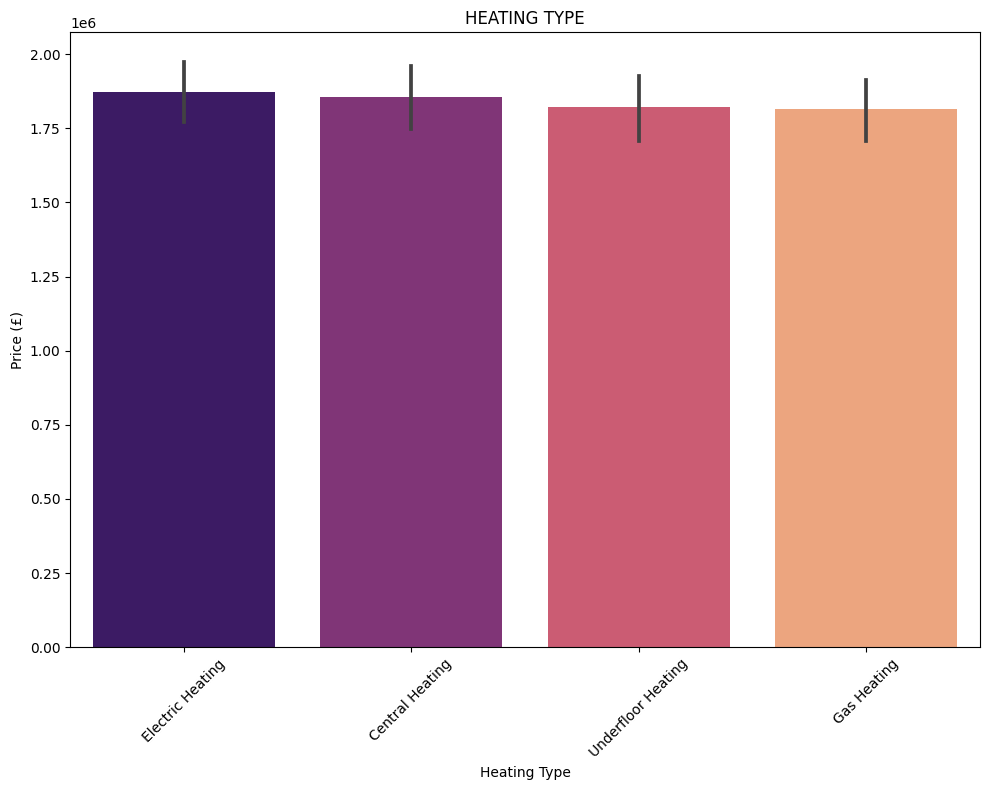

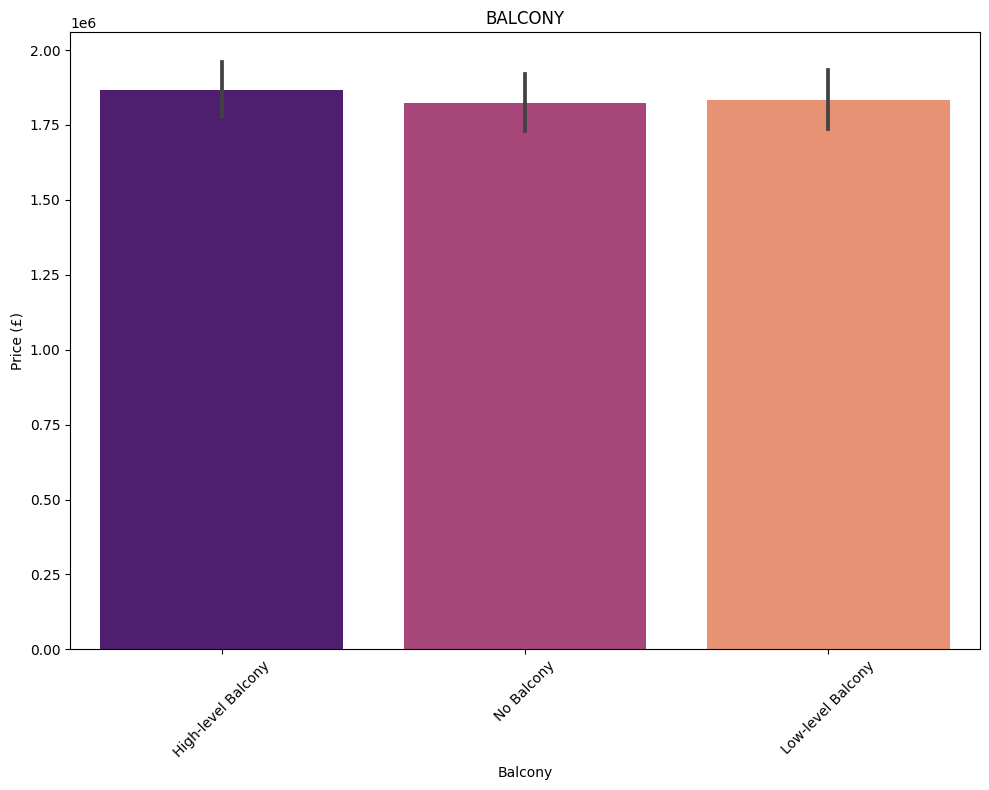

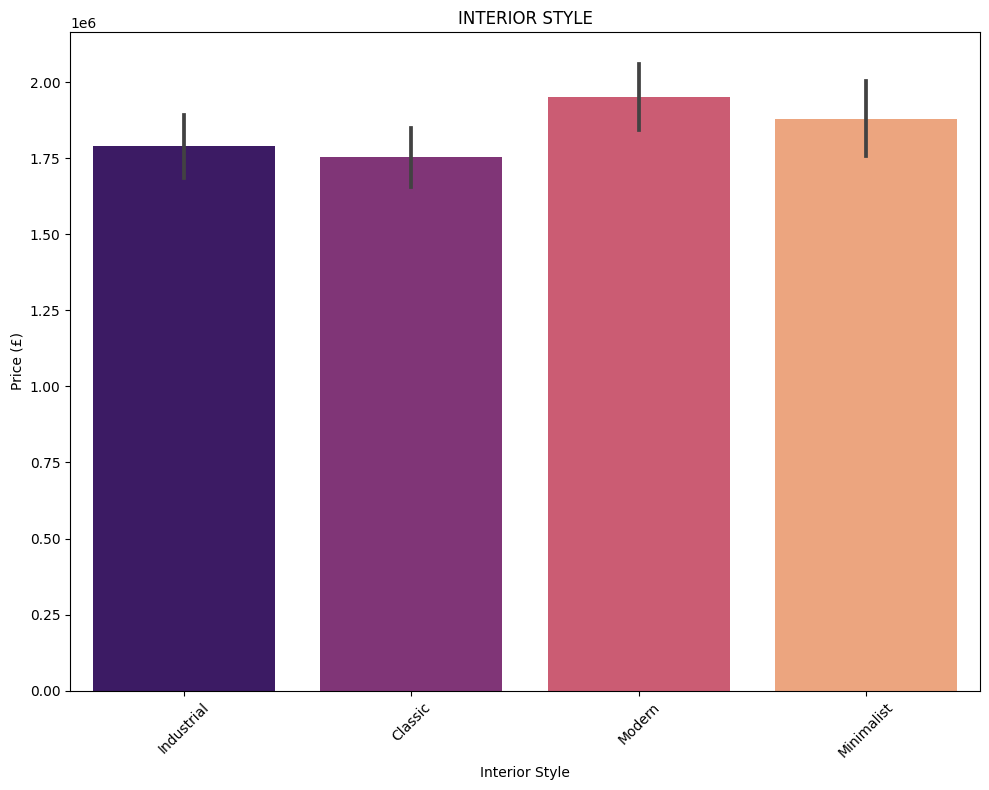

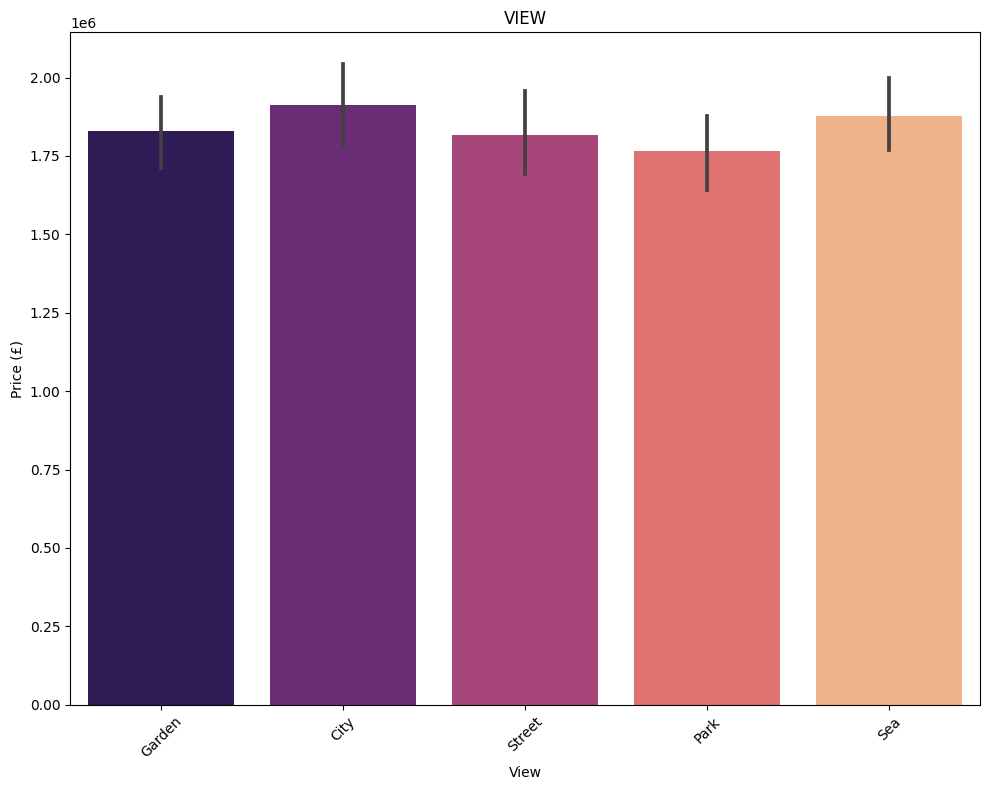

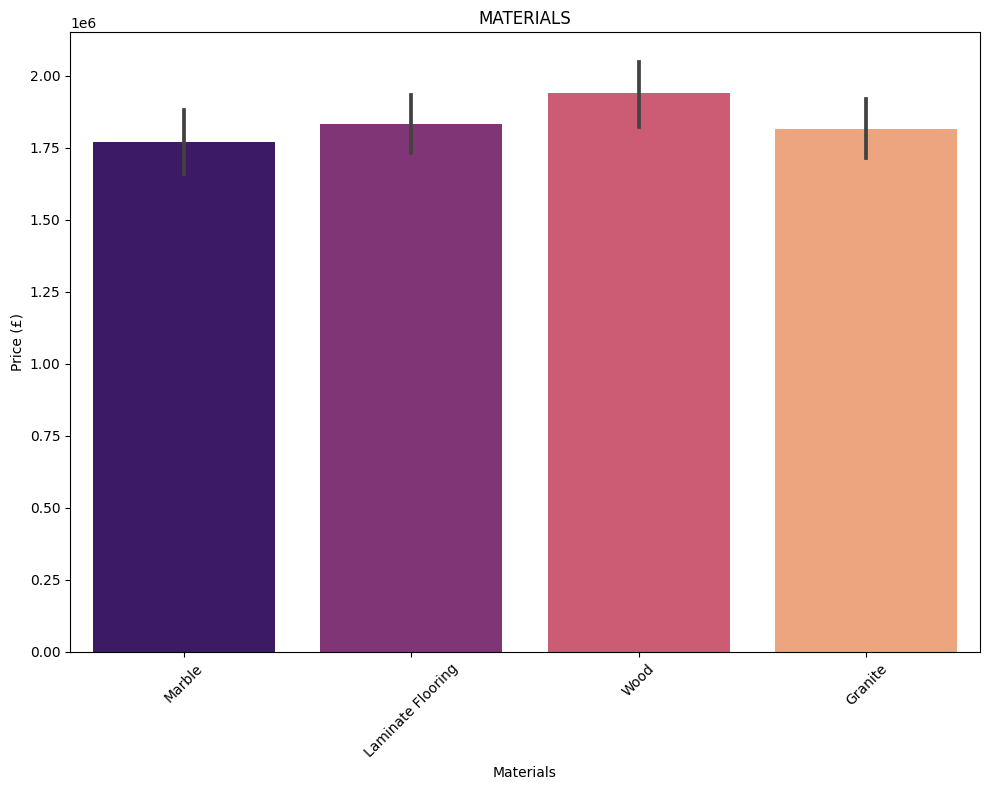

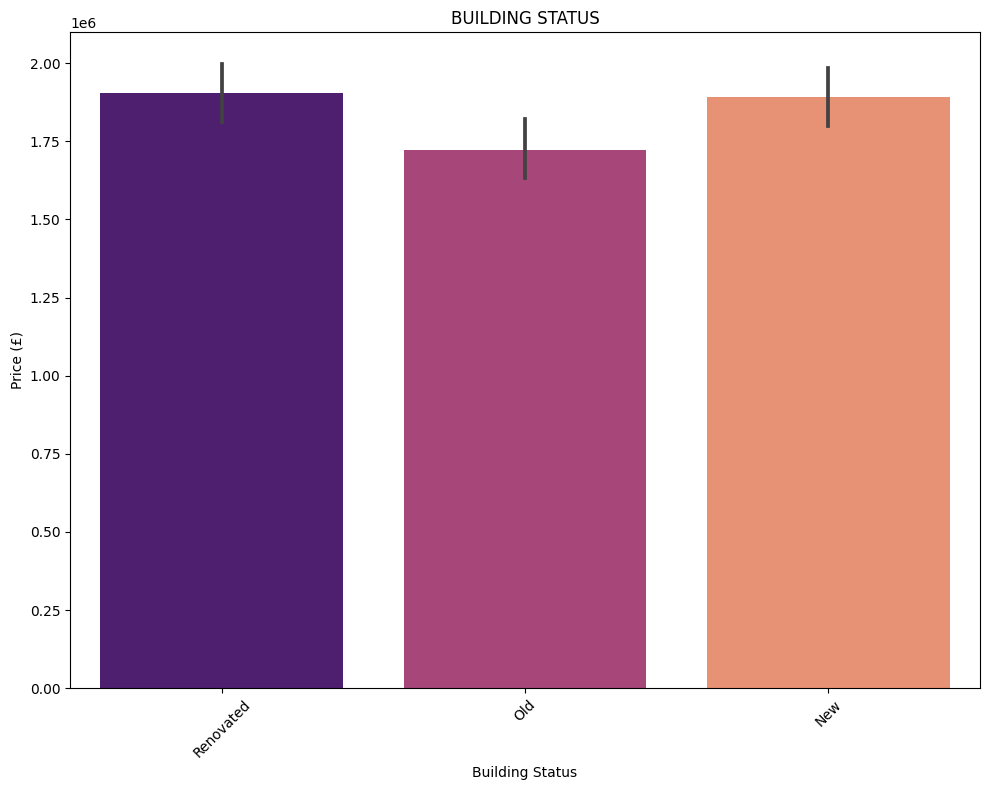

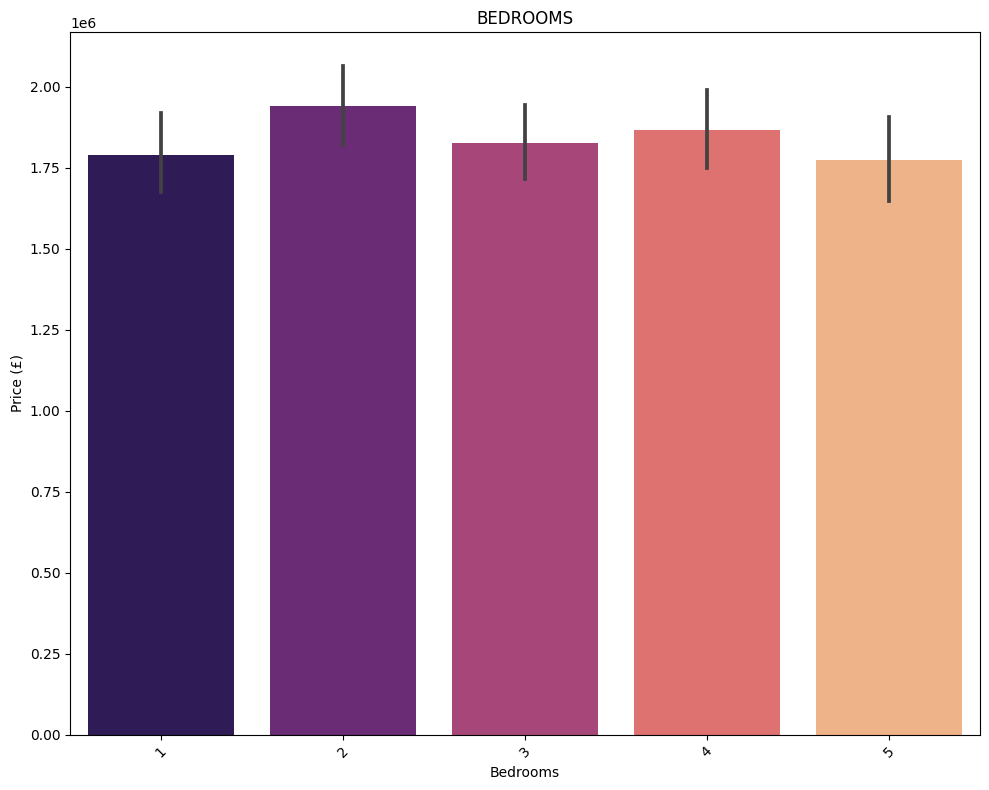

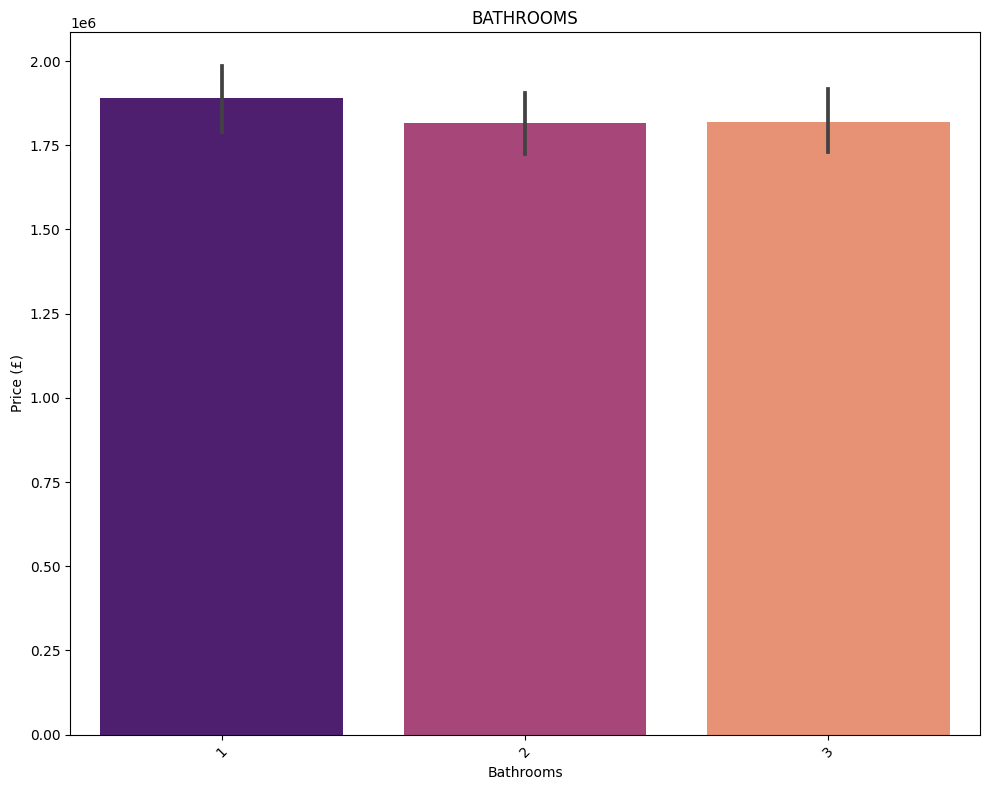

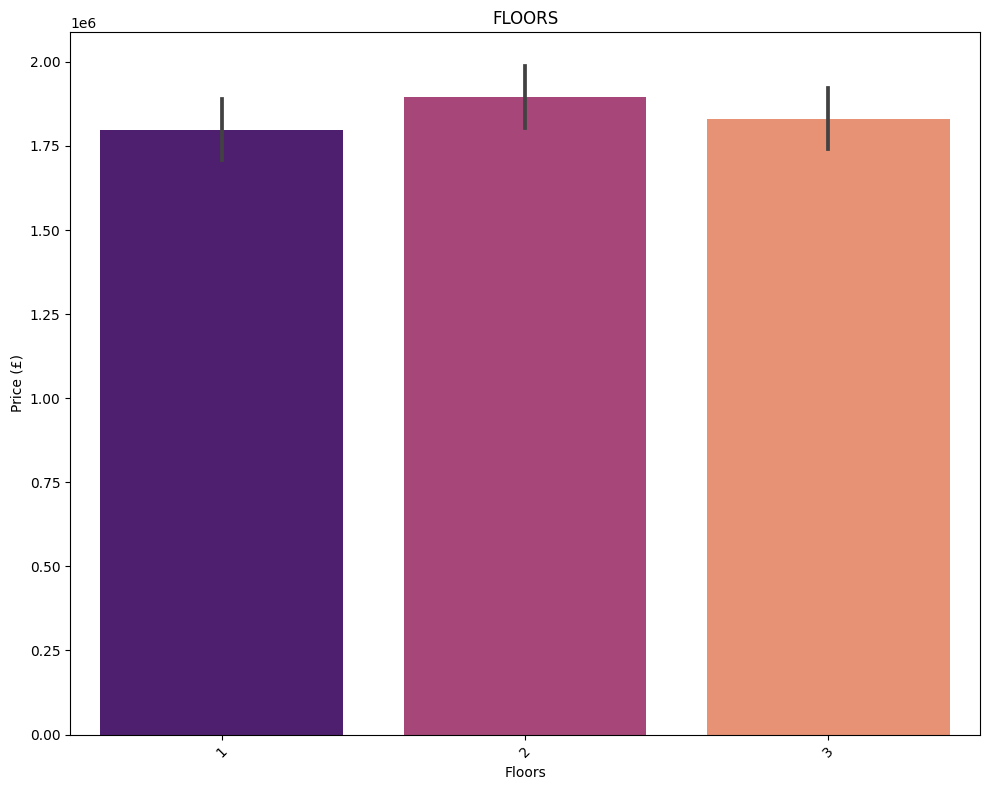

In [174]:
for col in cats:
    plt.figure(figsize=(10, 8))
    sns.barplot(x=col, y='Price (£)', data=df, palette='magma')
    plt.title(col.upper())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**KATEGORİK VERİLERİN GÖRSELLEŞTİRİLMESİ**

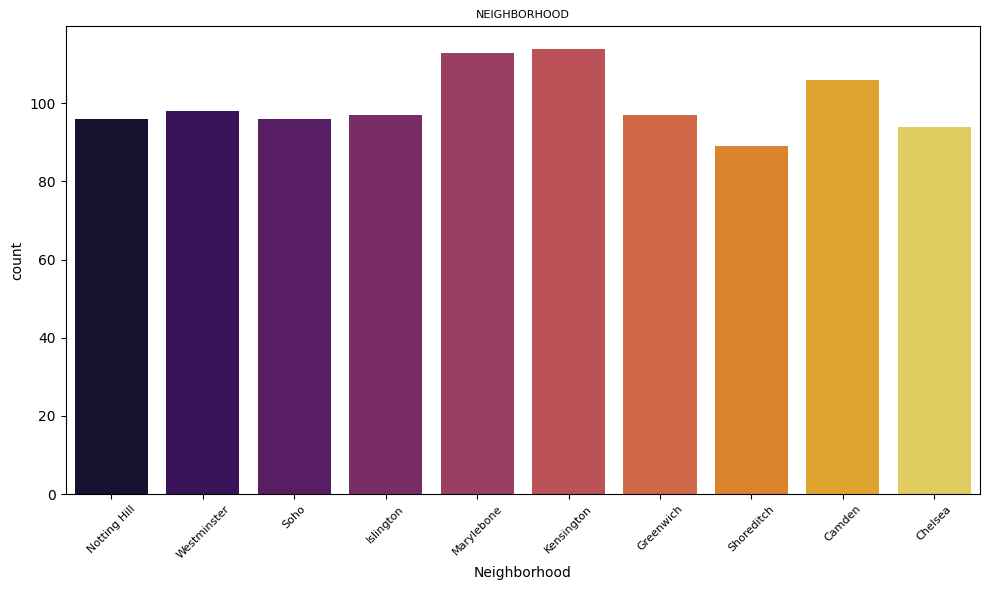

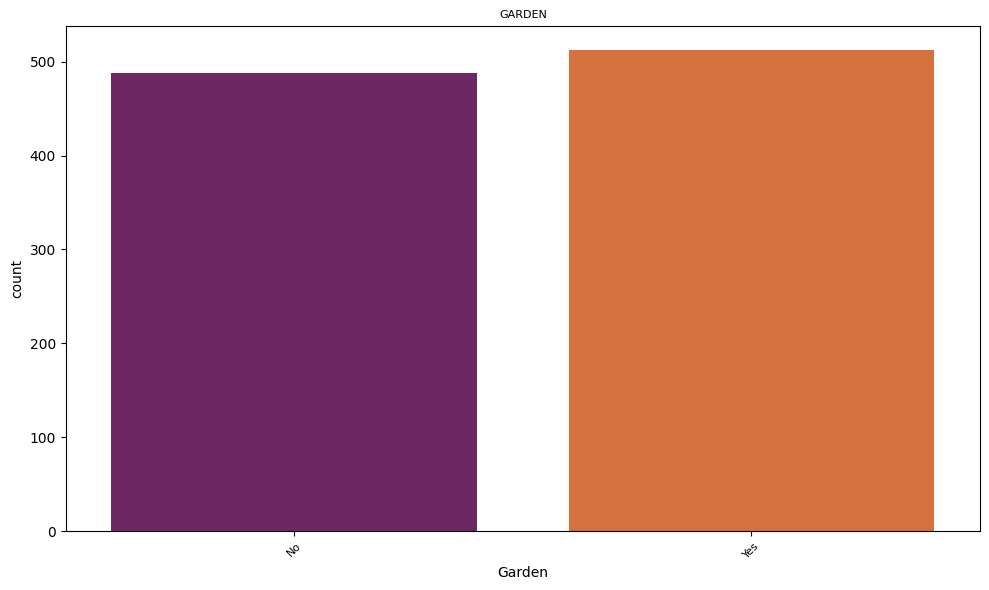

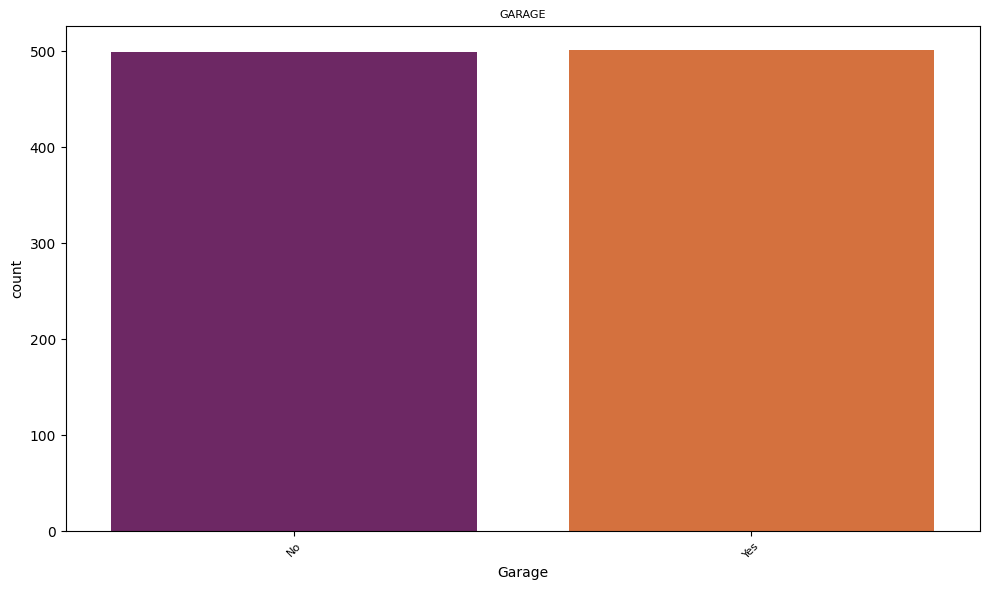

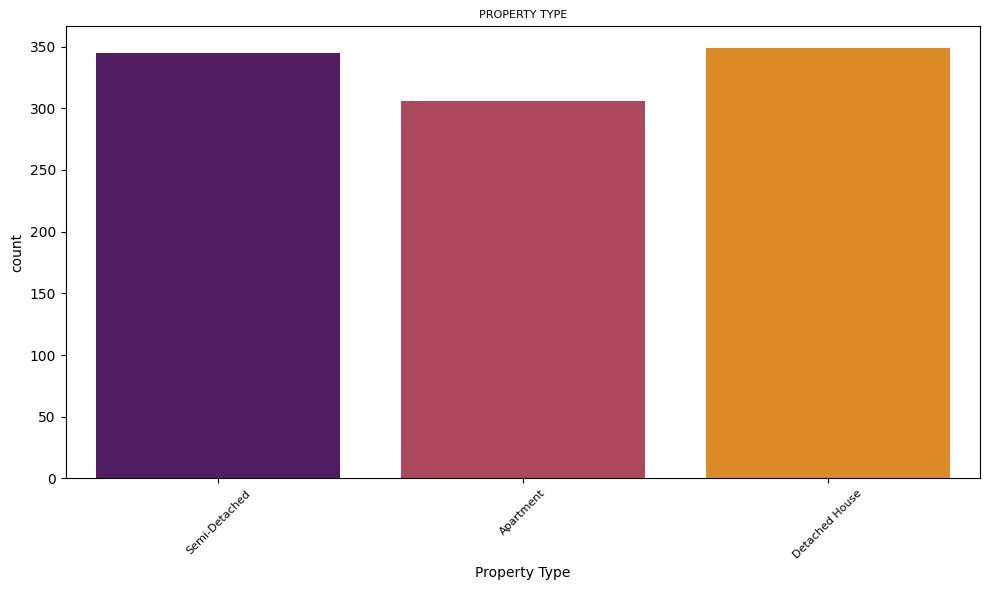

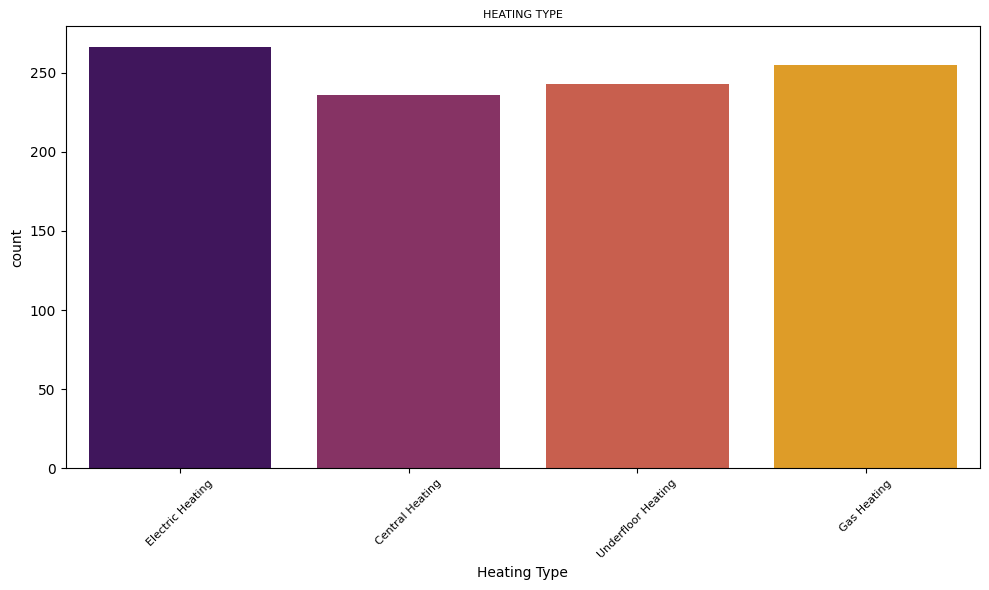

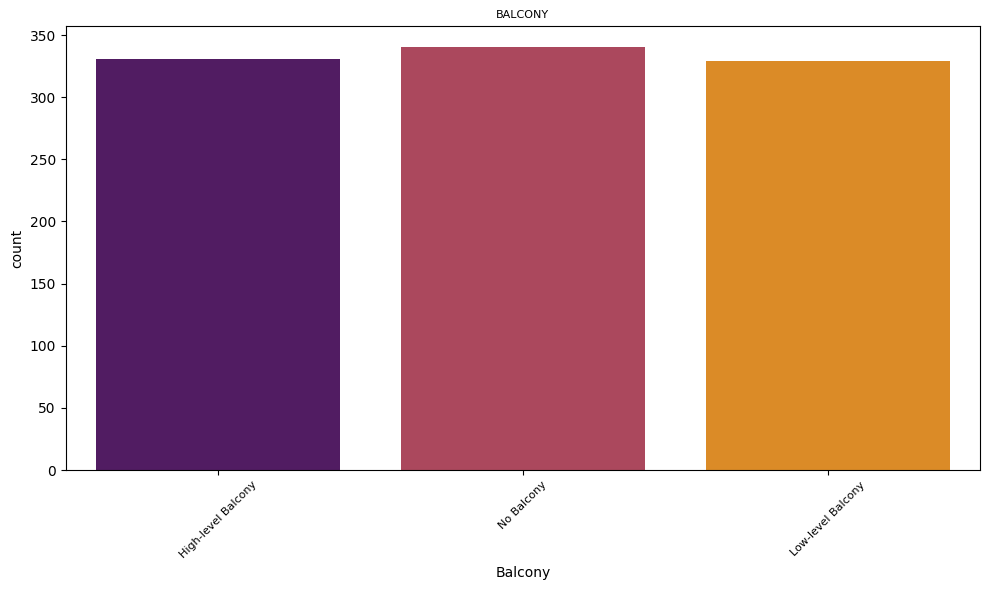

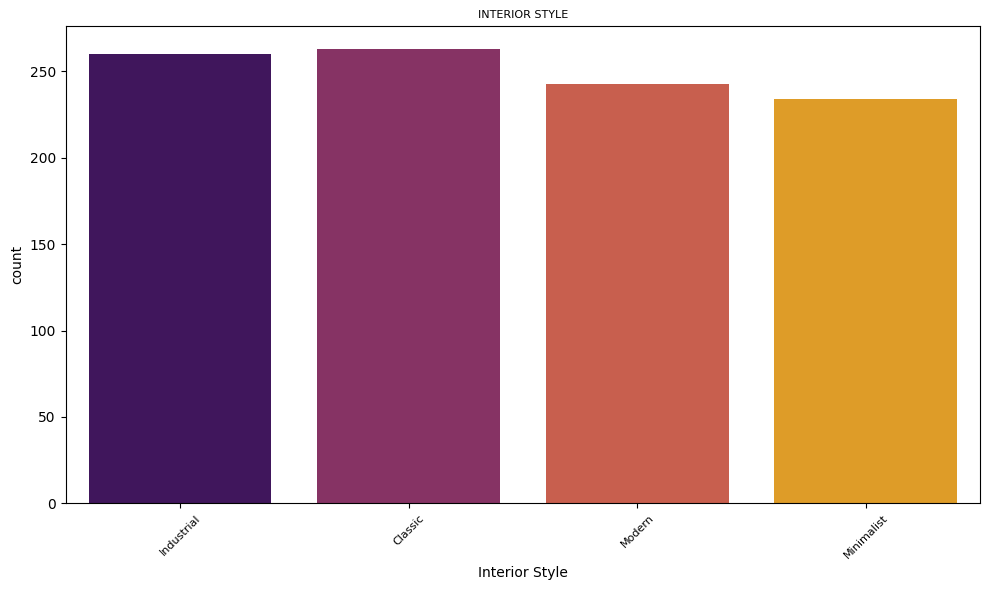

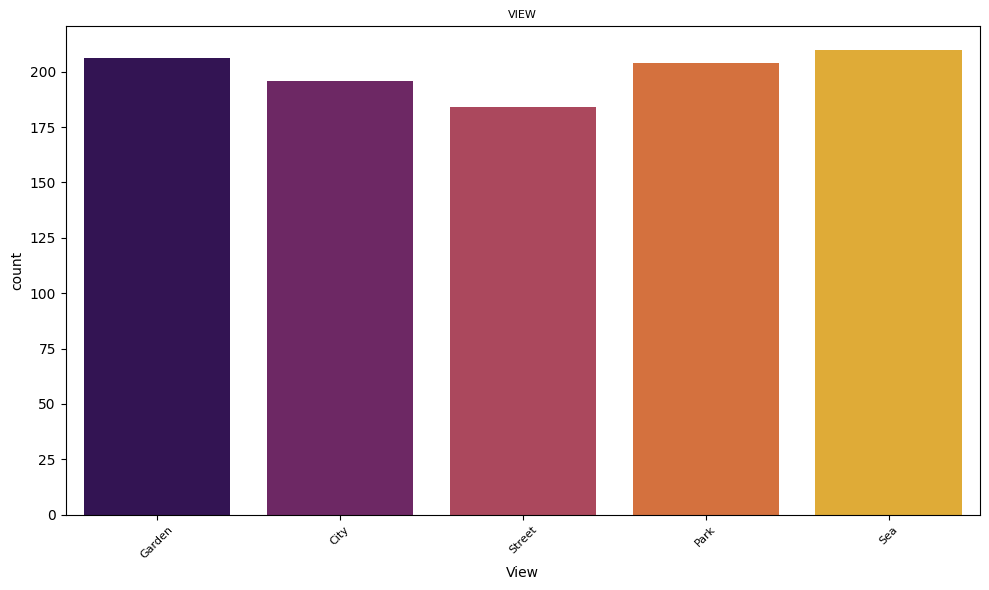

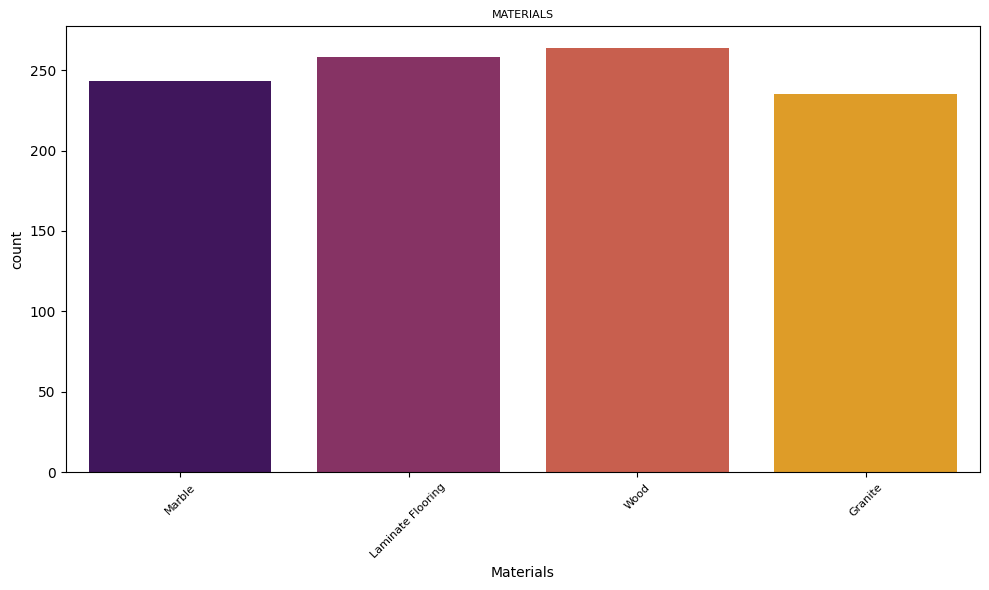

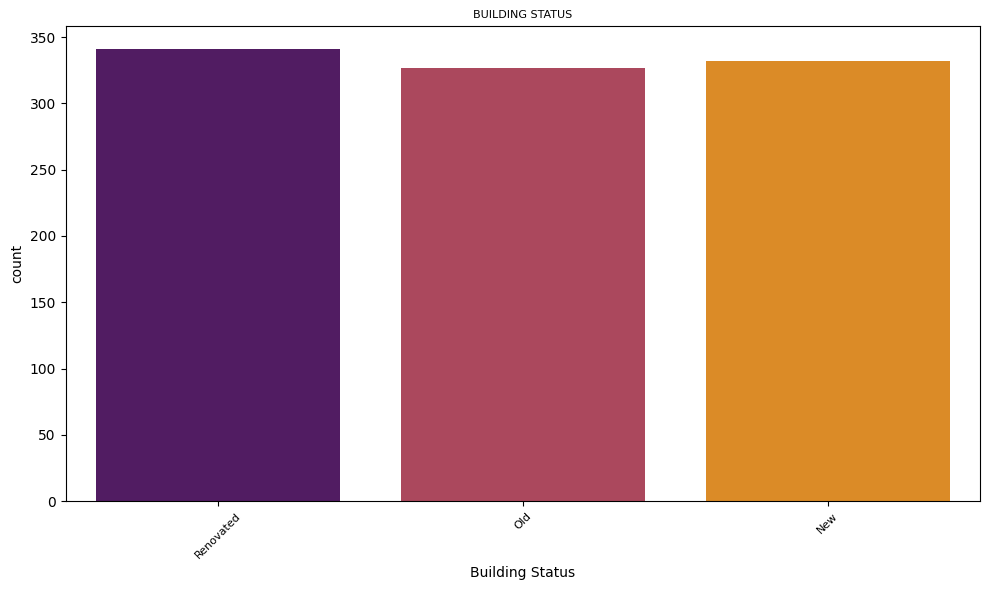

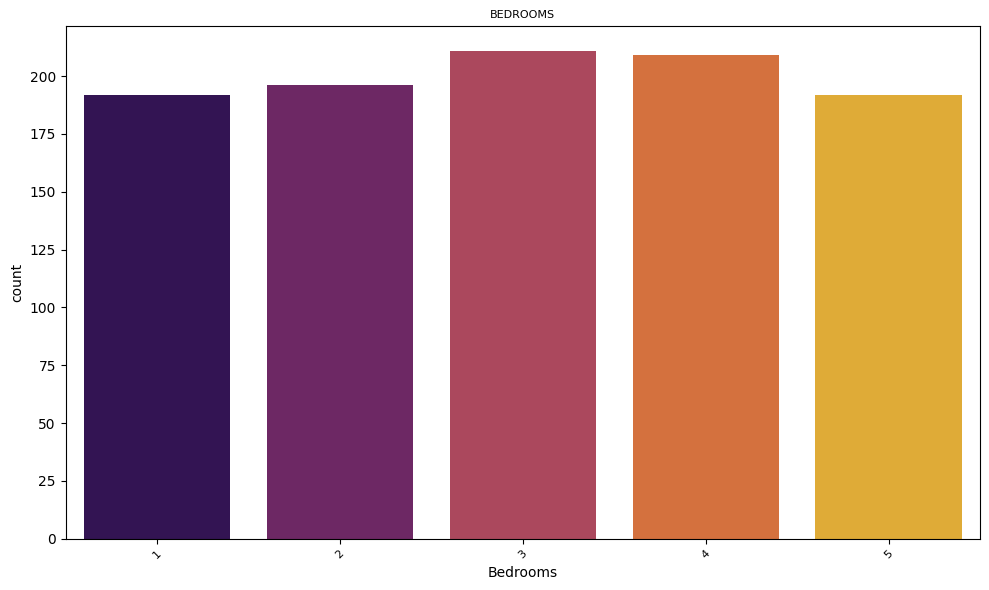

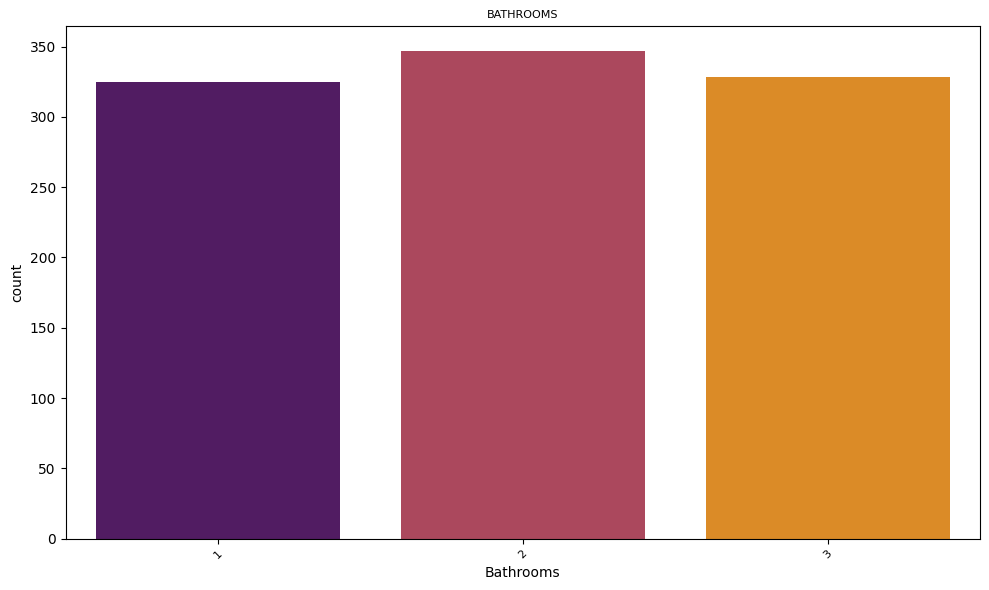

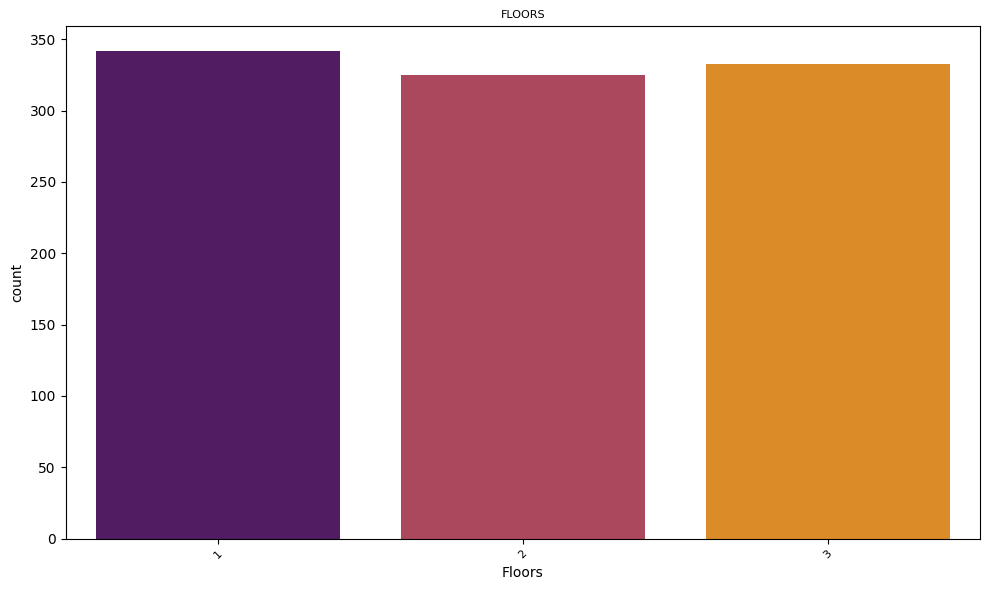

In [175]:
for col in cats:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df,x=col,palette='inferno')
    plt.title(col.upper(),fontsize=8)
    plt.xticks(rotation=45,fontsize=8)
    plt.tight_layout()
    plt.show()

**NÜMERİK DEĞİŞKENLERİN BİRBİRİ ARASINDAKİ KORELASYONU**

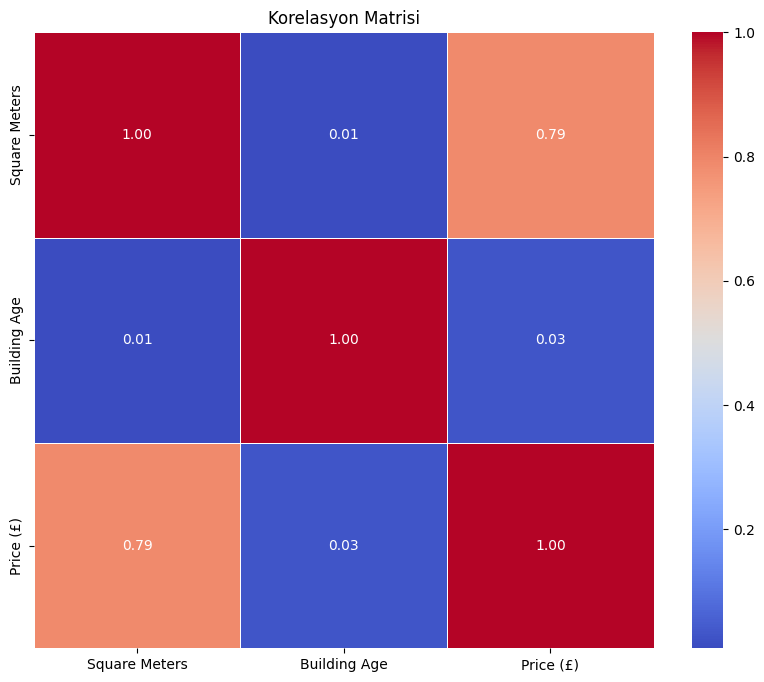

In [176]:
correlation_matrix = df[nums].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()


**BOXPLOT**

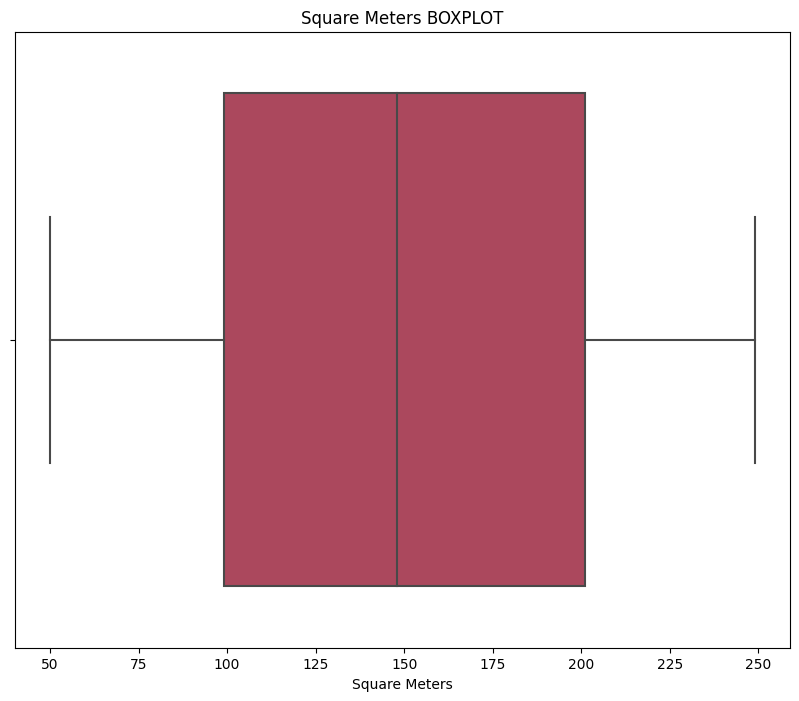

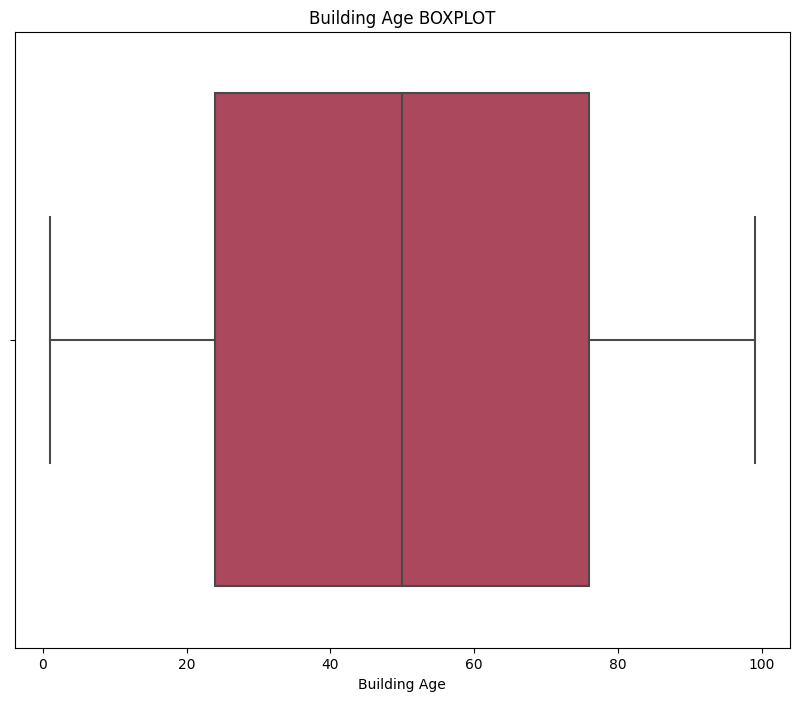

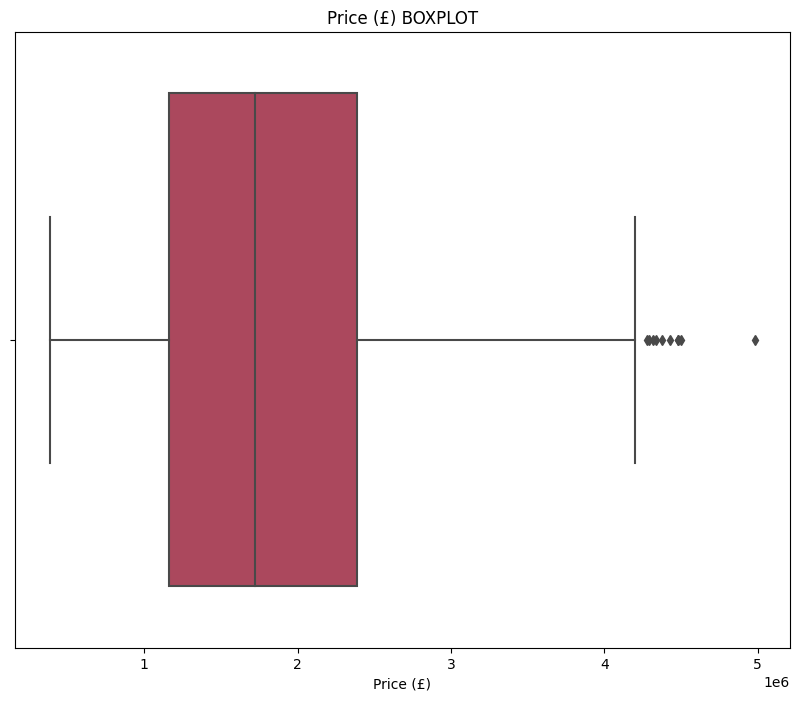

In [177]:
for col in nums:
    plt.figure(figsize=(10,8))
    sns.boxplot(data=df,x=col,palette='inferno')
    plt.title(f"{col} BOXPLOT")
    plt.show()

**Aykırı Değerlerin Baskılanması**

In [178]:
for col in nums:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Outlier"] = iso_forest.fit_predict(df[["Square Meters", "Building Age", "Price (£)"]])

# Aykırı değerleri görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Square Meters", y="Price (£)", hue="Outlier", palette="coolwarm", s=100)
plt.title("Aykırı Değer Analizi: Alan ve Fiyat İlişkisi")
plt.xlabel("Square Meters")
plt.ylabel("Price (£)")
plt.legend(title="Outlier")
plt.tight_layout()
plt.show()


In [ ]:
df

In [ ]:
for col in cats:
    print(f"{col} için Sınıf Dağılımı:\n{df[col].value_counts()}\n")


In [ ]:
for col in cats:
    print(f"{col} için Ortalama Fiyat:\n{df.groupby(col)['Price (£)'].mean()}\n")


# KEŞİFSEL VERİ ANALİZİ (EDA)

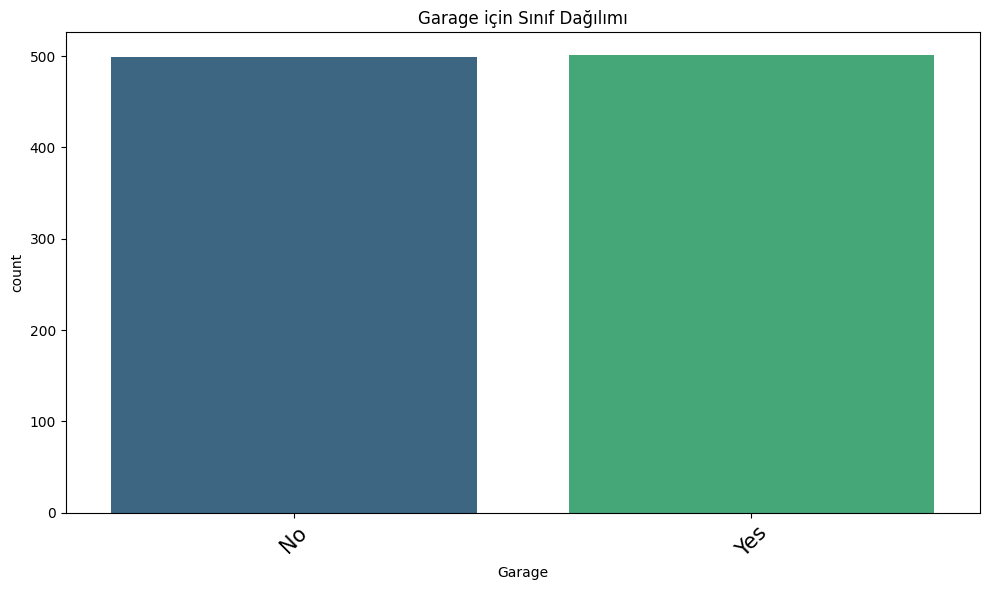

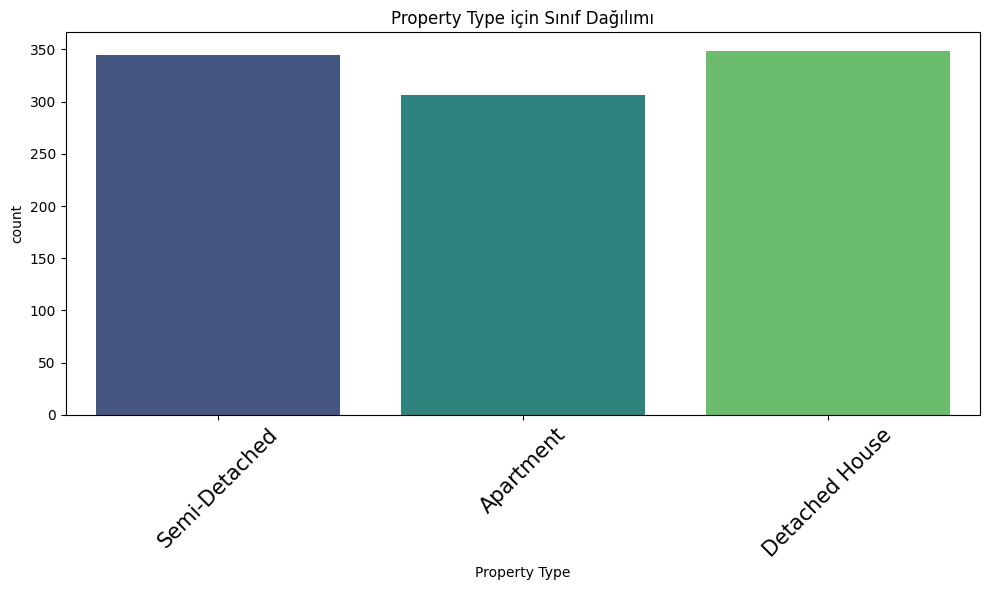

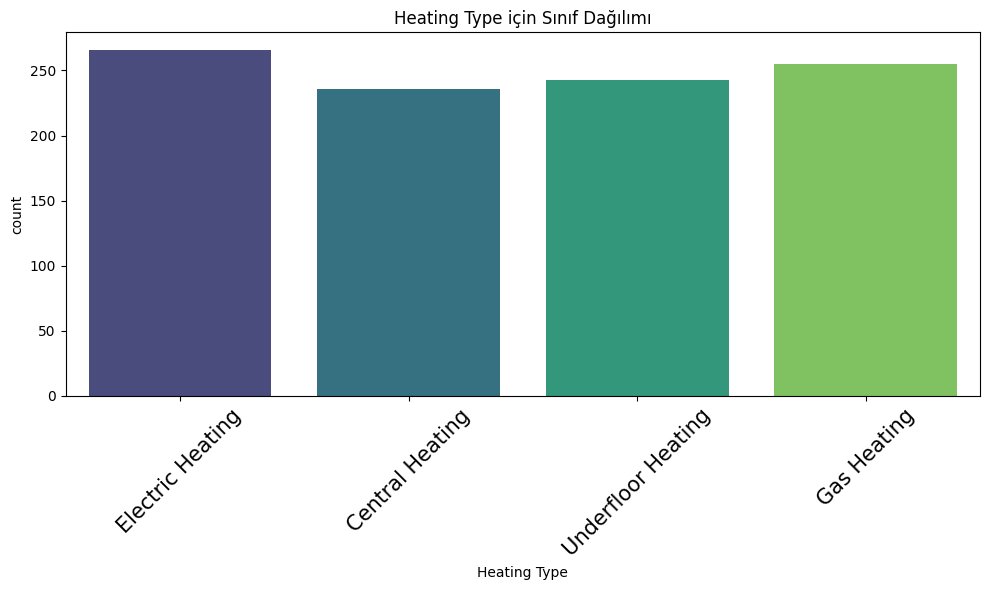

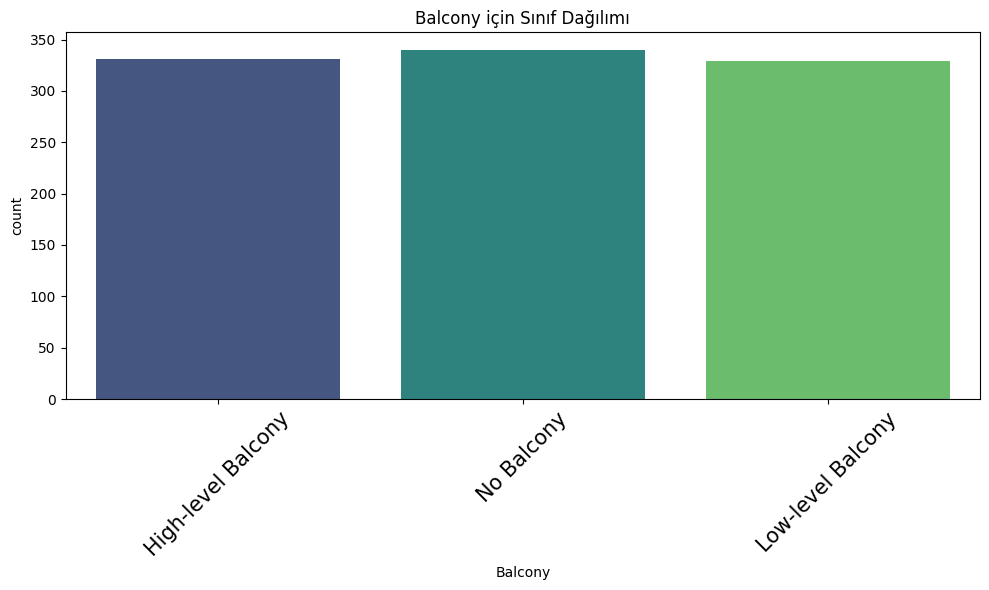

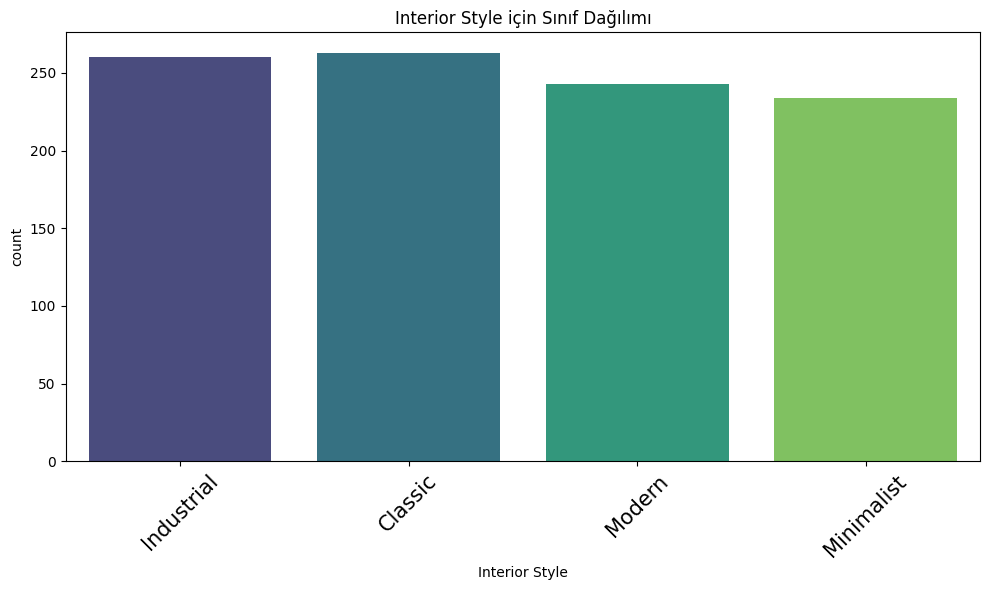

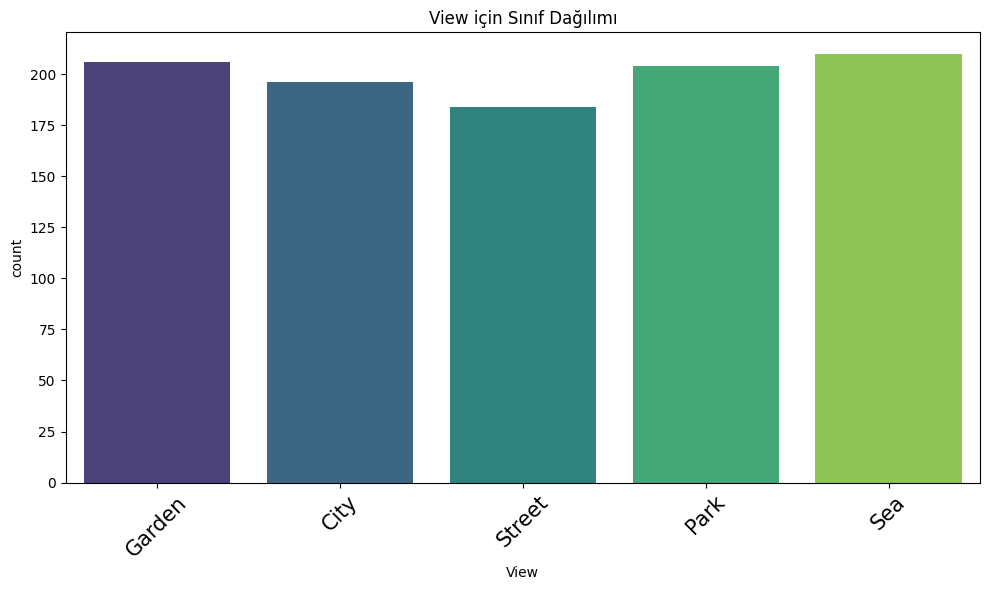

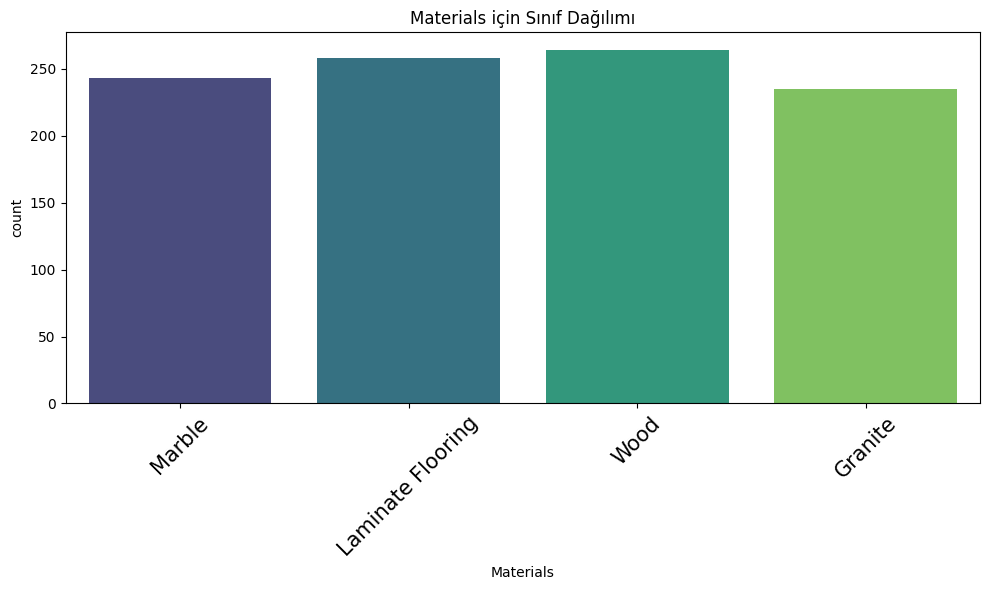

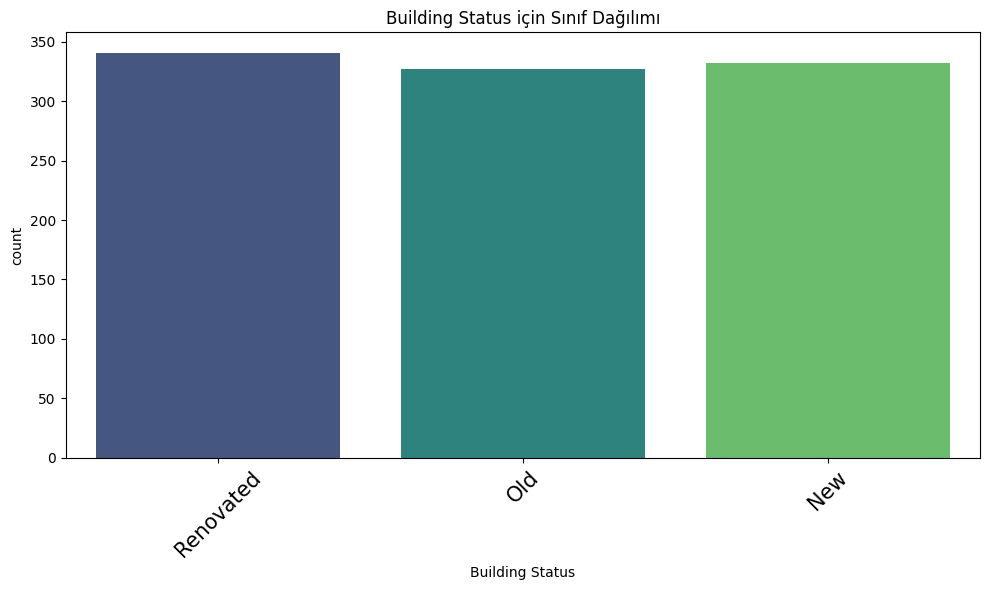

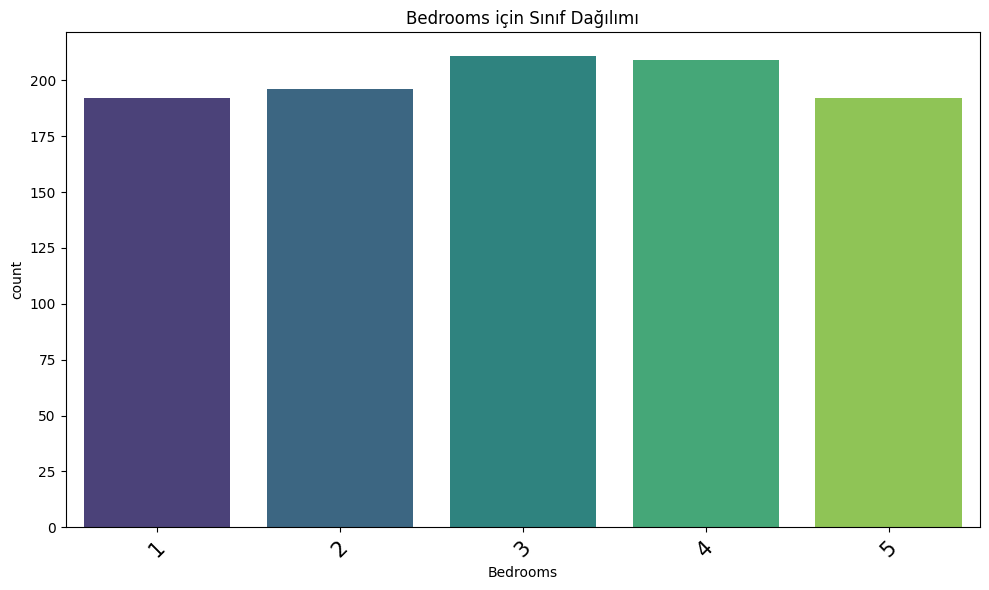

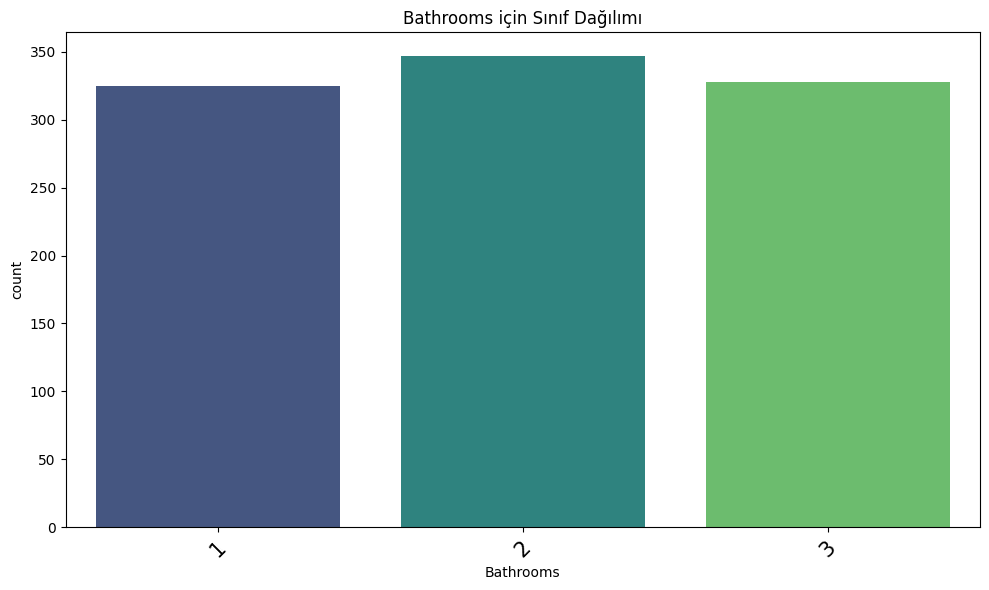

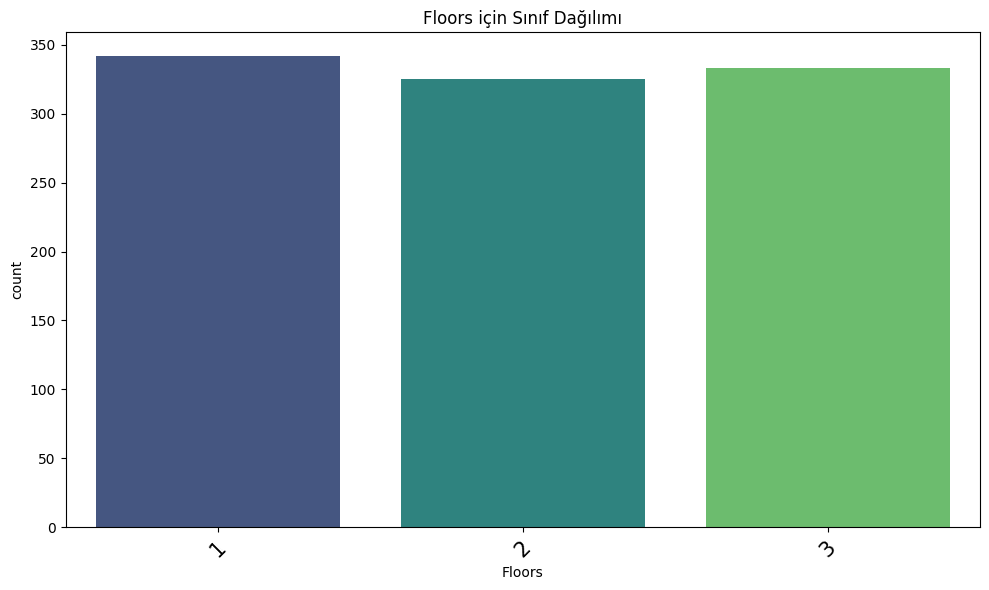

In [183]:
for col in cats:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"{col} için Sınıf Dağılımı")
    plt.xticks(rotation=45,fontsize=15)
    plt.tight_layout()
    plt.show()

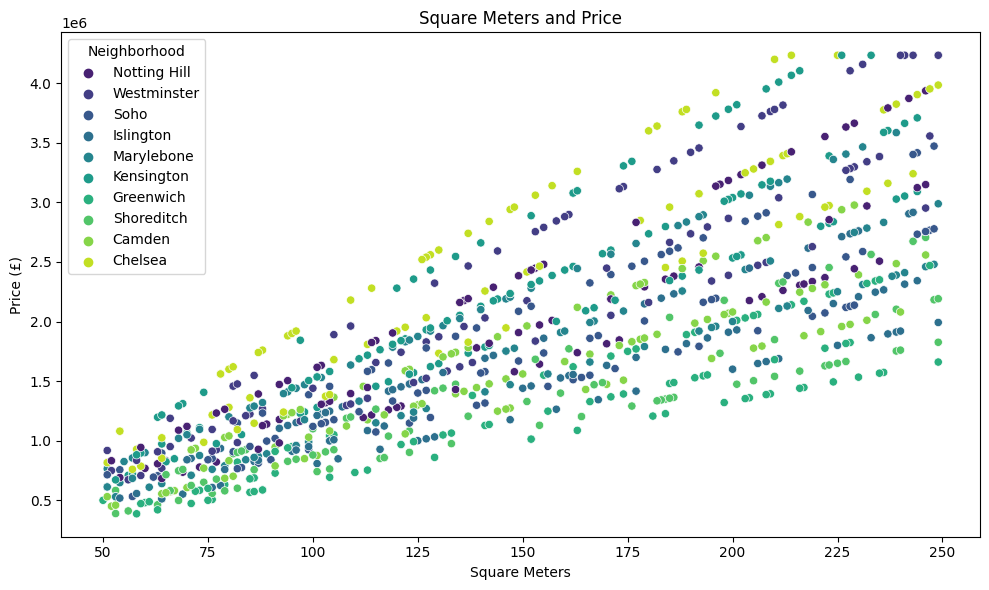

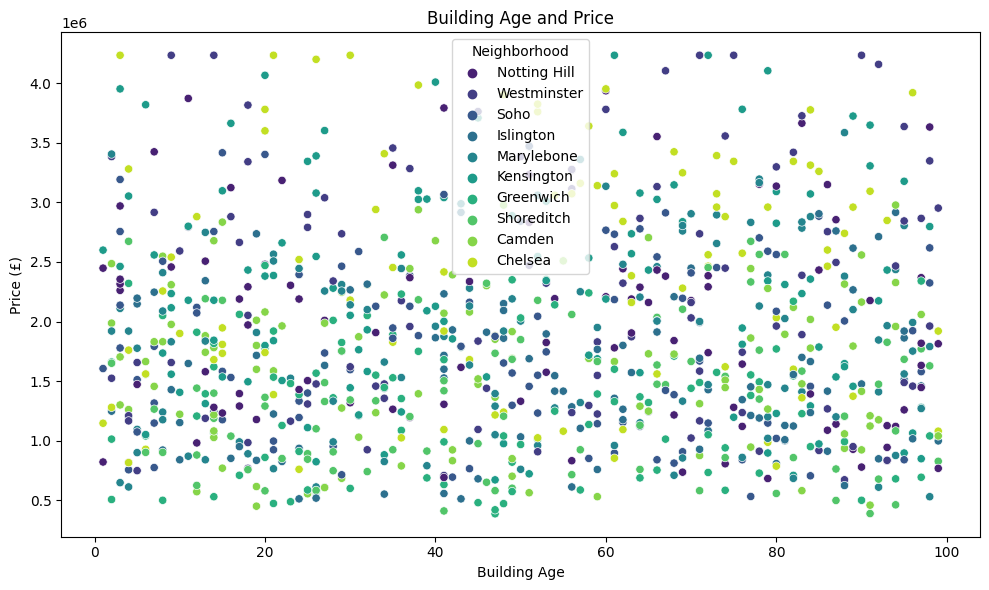

In [184]:
for col in nums:
    if col != "Price (£)":
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=col, y="Price (£)", hue="Neighborhood", palette="viridis")
        plt.title(f"{col} and Price")
        plt.tight_layout()
        plt.show()


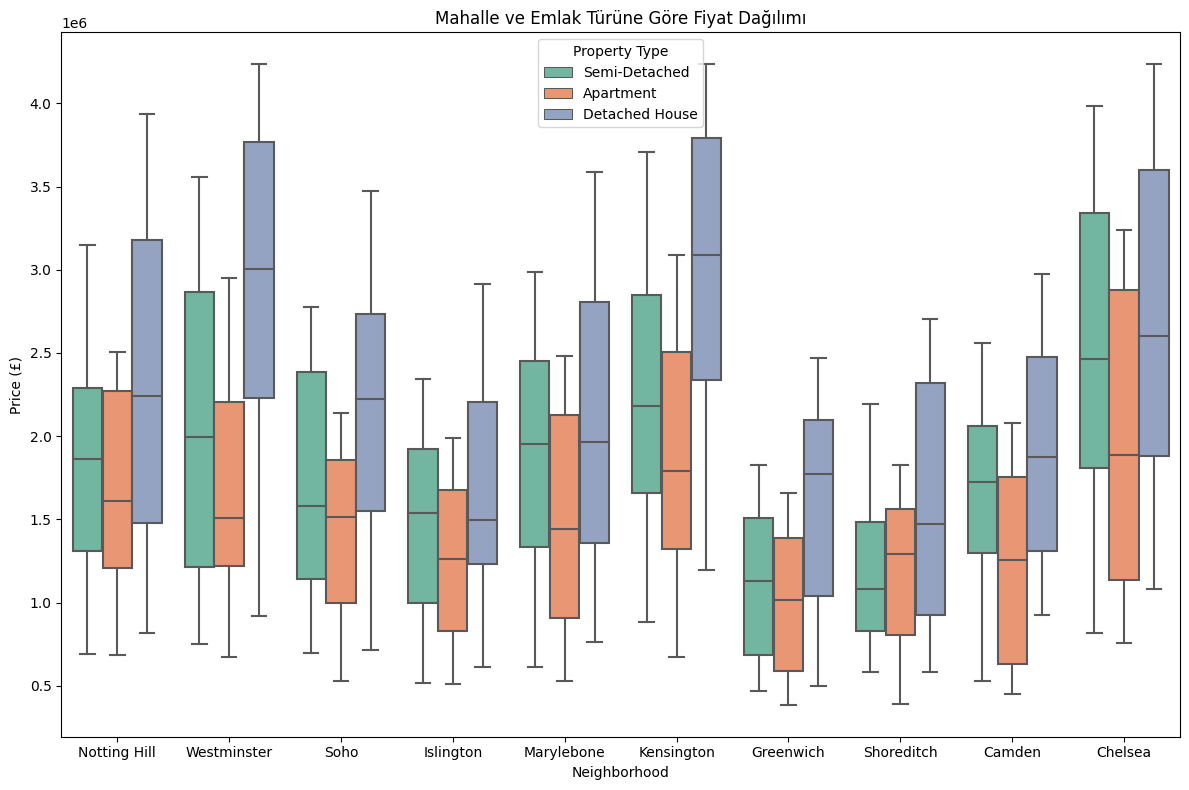

In [185]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Neighborhood", y="Price (£)", hue="Property Type", palette="Set2")
plt.title("Mahalle ve Emlak Türüne Göre Fiyat Dağılımı")
plt.xlabel("Neighborhood")
plt.ylabel("Price (£)")
plt.legend(title="Property Type")
plt.tight_layout()
plt.show()

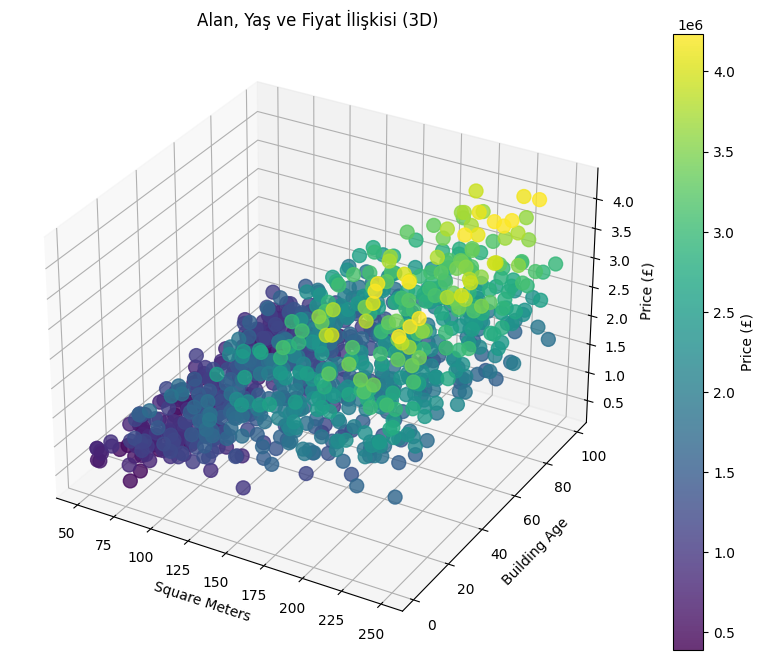

In [186]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df["Square Meters"], 
    df["Building Age"], 
    df["Price (£)"], 
    c=df["Price (£)"], 
    cmap="viridis", 
    s=100, 
    alpha=0.8
)
ax.set_xlabel("Square Meters")
ax.set_ylabel("Building Age")
ax.set_zlabel("Price (£)")
plt.colorbar(scatter, label="Price (£)")
plt.title("Alan, Yaş ve Fiyat İlişkisi (3D)")
plt.show()


**Fiyat Dağılımının Yoğunluk Grafiği**

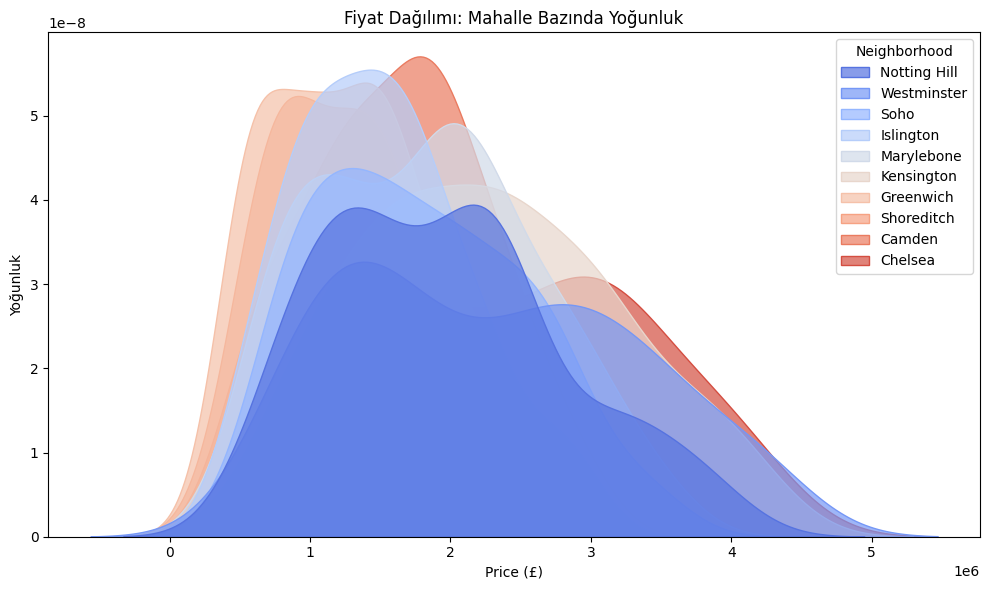

In [187]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Price (£)", hue="Neighborhood", fill=True, palette="coolwarm", alpha=0.7)
plt.title("Fiyat Dağılımı: Mahalle Bazında Yoğunluk")
plt.xlabel("Price (£)")
plt.ylabel("Yoğunluk")
plt.tight_layout()
plt.show()


**İç Mekan Tarzı ve Görünüm Analizi**

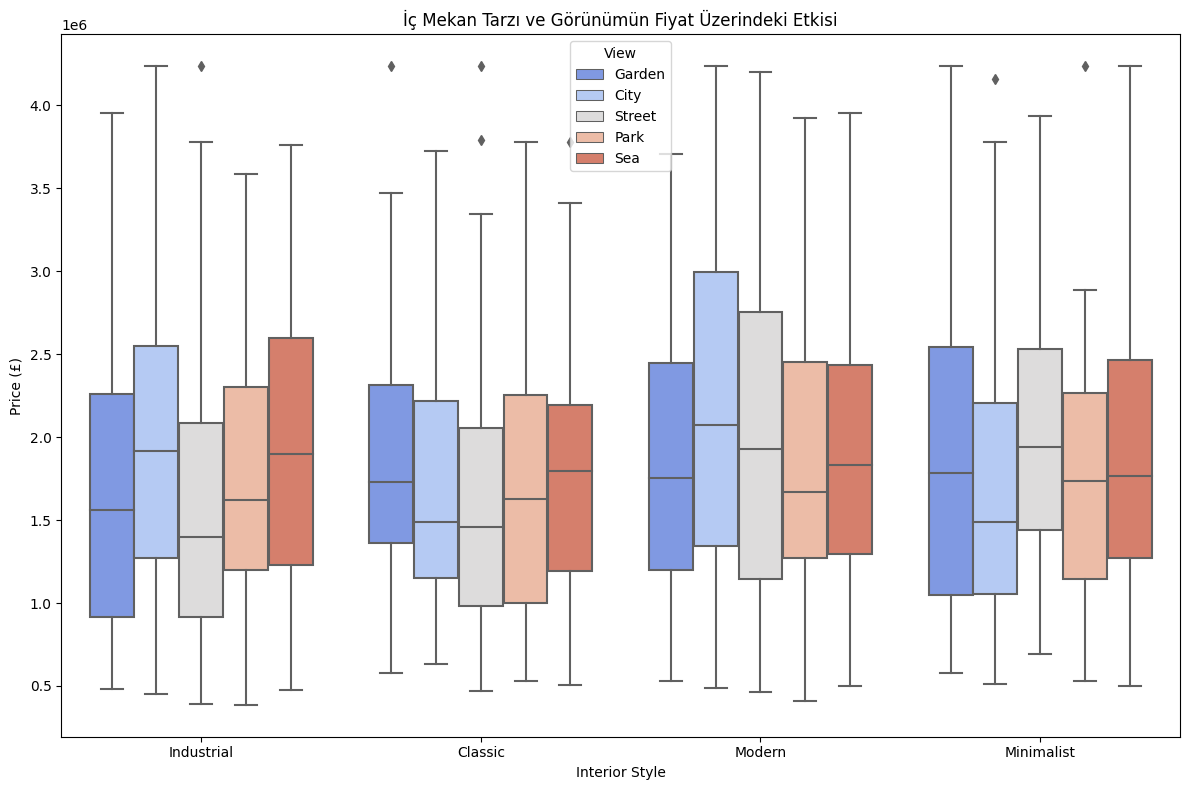

In [188]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Interior Style", y="Price (£)", hue="View", palette="coolwarm")
plt.title("İç Mekan Tarzı ve Görünümün Fiyat Üzerindeki Etkisi")
plt.xlabel("Interior Style")
plt.ylabel("Price (£)")
plt.legend(title="View")
plt.tight_layout()
plt.show()

In [189]:
import folium


map = folium.Map(location=[51.509865, -0.118092], zoom_start=12)

# Her mülk için bir işaret ekleme
coordinates = [
    [51.5145, -0.1466],  # Notting Hill
    [51.5142, -0.1439],  # Westminster
    [51.5136, -0.1365],  # Soho
    [51.5194, -0.1025],  # Islington
]
for i, coord in enumerate(coordinates):
    folium.Marker(coord, popup=f"{df.iloc[i]['Address']}: £{df.iloc[i]['Price (£)']}").add_to(map)

map


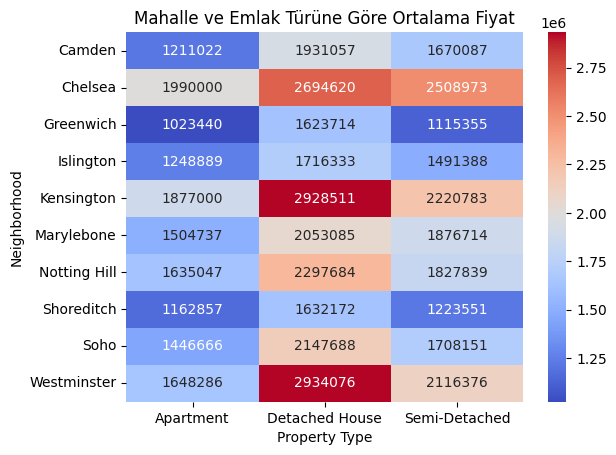

In [190]:
pivot = df.pivot_table(values="Price (£)", index="Neighborhood", columns="Property Type", aggfunc="mean")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Mahalle ve Emlak Türüne Göre Ortalama Fiyat")
plt.xlabel("Property Type")
plt.ylabel("Neighborhood")
plt.show()


# ÖZELLİK MÜHENDİSLİĞİ
**KEŞİFSEL VERİ ANALİZİ**

In [191]:

df["Price per Square Meter"] = df["Price (£)"] / df["Square Meters"]
df["Luxury Indicator"] = (df["Price (£)"] > 2_000_000).astype(int)
df["Renovation Age"] = df["Building Age"].where(df["Building Status"] == "Renovated", None)
df["Garden and Garage Index"] = (df["Garden"].map({"Yes": 1, "No": 0}) + 
                                   df["Garage"].map({"Yes": 1, "No": 0}))
material_scores = {"Marble": 3, "Granite": 2, "Laminate Flooring": 1, "Wood": 1}
df["Building Quality Score"] = df["Materials"].map(material_scores) + (df["Building Status"] == "Renovated").astype(int)



**Fiyat/Metrekare Dağılımı**

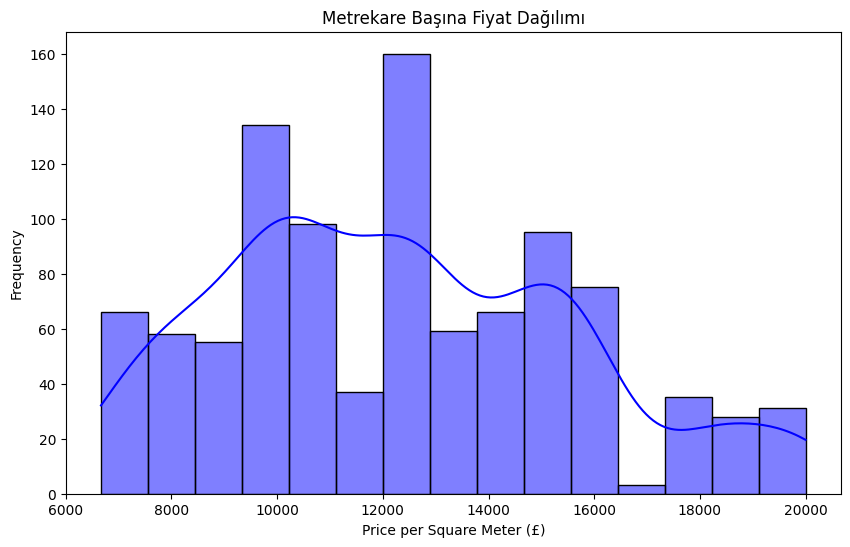

In [192]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Price per Square Meter"], kde=True, color="blue", bins=15)
plt.title("Metrekare Başına Fiyat Dağılımı")
plt.xlabel("Price per Square Meter (£)")
plt.ylabel("Frequency")
plt.show()


**Lüks Mülklerin Dağılımı**

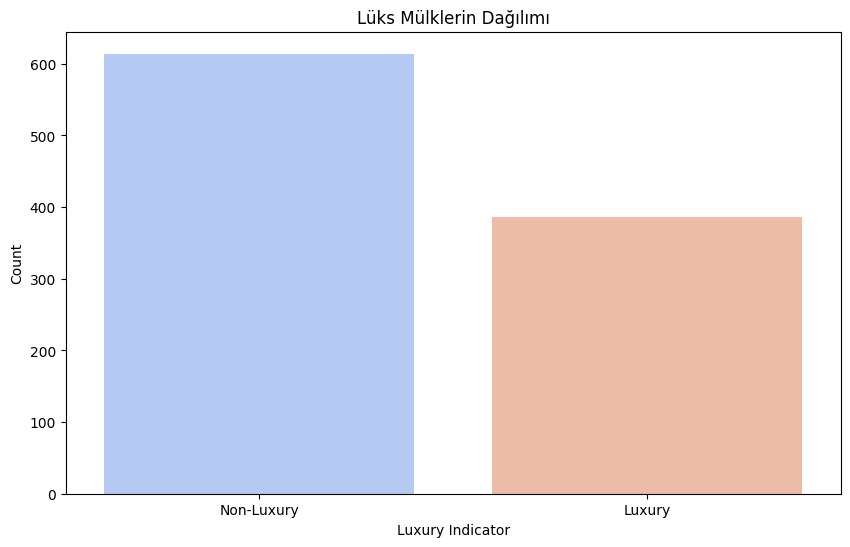

In [193]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Luxury Indicator", palette="coolwarm")
plt.title("Lüks Mülklerin Dağılımı")
plt.xticks([0, 1], ["Non-Luxury", "Luxury"])
plt.ylabel("Count")
plt.show()


**Bahçe ve Garaj Endeksi ile Fiyat İlişkisi**

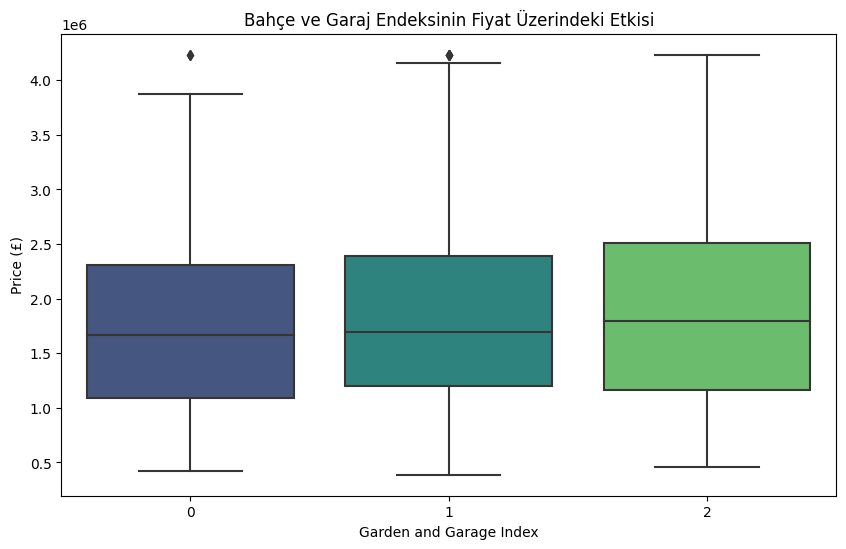

In [194]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Garden and Garage Index", y="Price (£)", palette="viridis")
plt.title("Bahçe ve Garaj Endeksinin Fiyat Üzerindeki Etkisi")
plt.xlabel("Garden and Garage Index")
plt.ylabel("Price (£)")
plt.show()


 **Yenilenmiş Binaların Yaş Dağılımı**

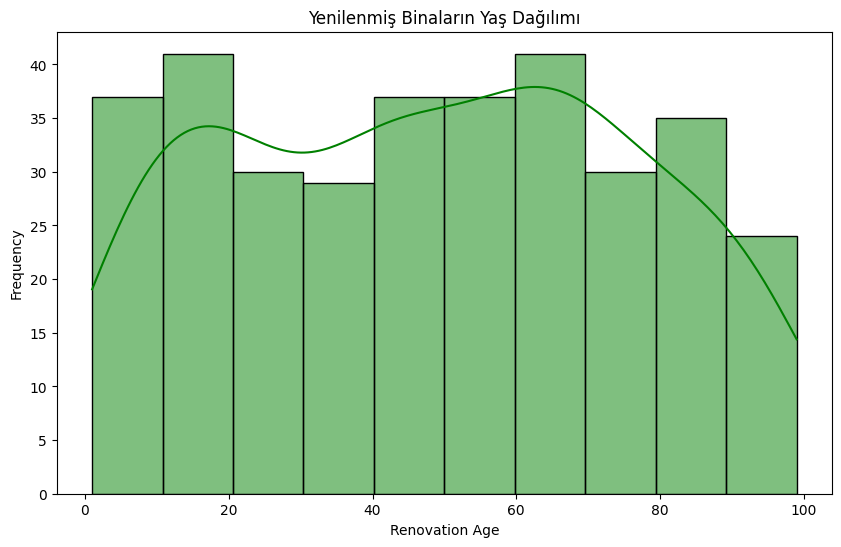

In [195]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Renovation Age"].dropna(), kde=True, color="green", bins=10)
plt.title("Yenilenmiş Binaların Yaş Dağılımı")
plt.xlabel("Renovation Age")
plt.ylabel("Frequency")
plt.show()


**Çoklu Özelliklerle Fiyat Tahmini**

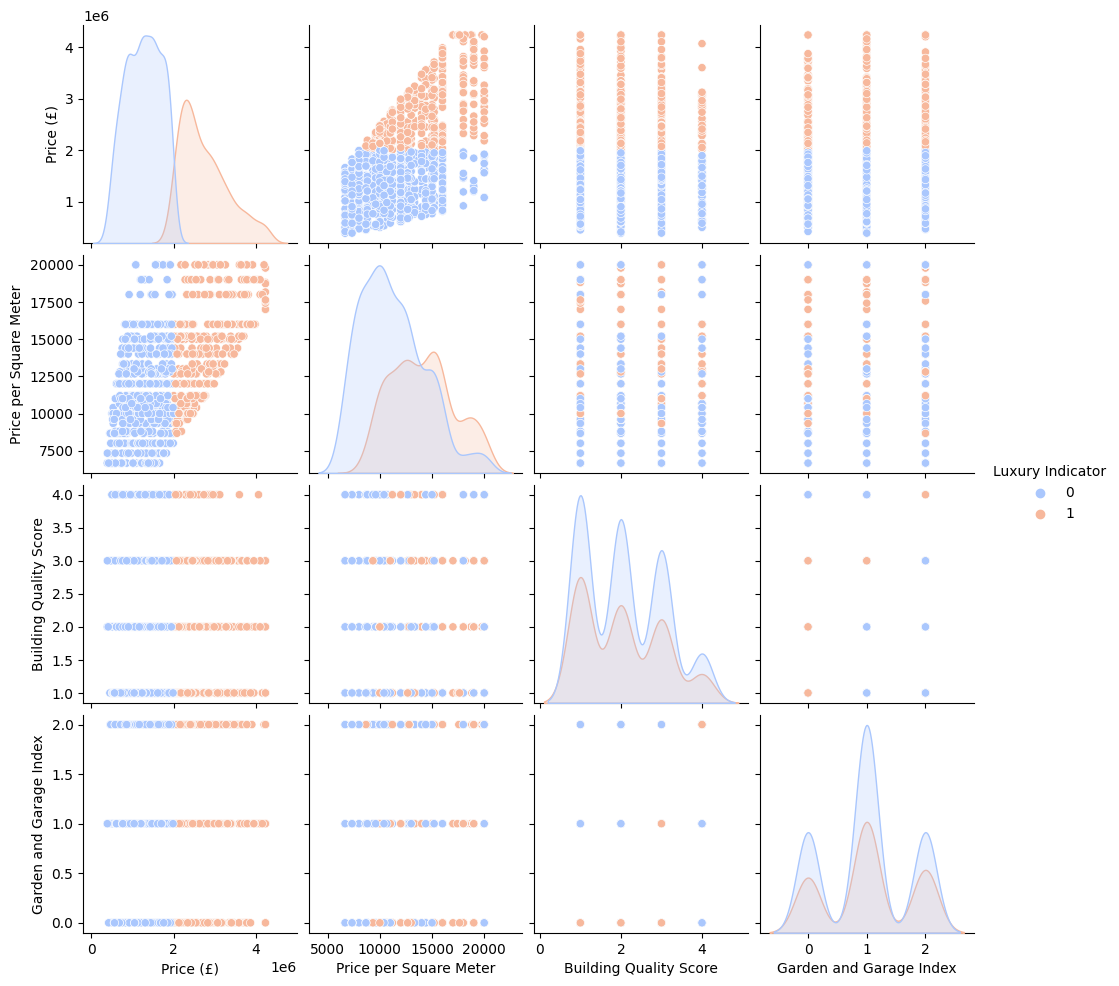

In [196]:
sns.pairplot(df, vars=["Price (£)", "Price per Square Meter", "Building Quality Score", "Garden and Garage Index"], 
             hue="Luxury Indicator", palette="coolwarm", diag_kind="kde")
plt.show()


**"Property Age Category" - Mülkün Yaş Kategorisi**

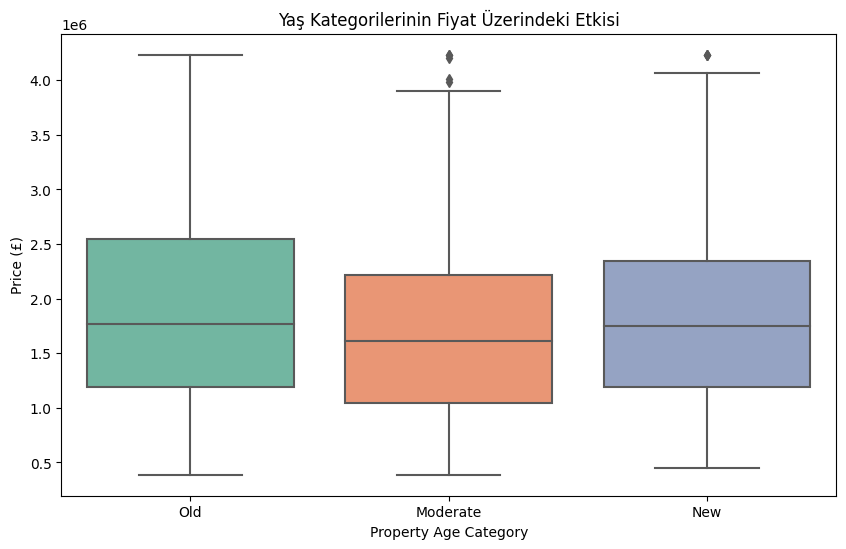

In [197]:
def age_category(age):
    if age <= 20:
        return "New"
    elif 21 <= age <= 50:
        return "Moderate"
    else:
        return "Old"

df["Property Age Category"] = df["Building Age"].apply(age_category)

# Görselleştirme: Yaş Kategorilerinin Fiyat Üzerindeki Etkisi
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Property Age Category", y="Price (£)", palette="Set2")
plt.title("Yaş Kategorilerinin Fiyat Üzerindeki Etkisi")
plt.xlabel("Property Age Category")
plt.ylabel("Price (£)")
plt.show()


**"Room to Bathroom Ratio" - Oda/Banyo Oranı**

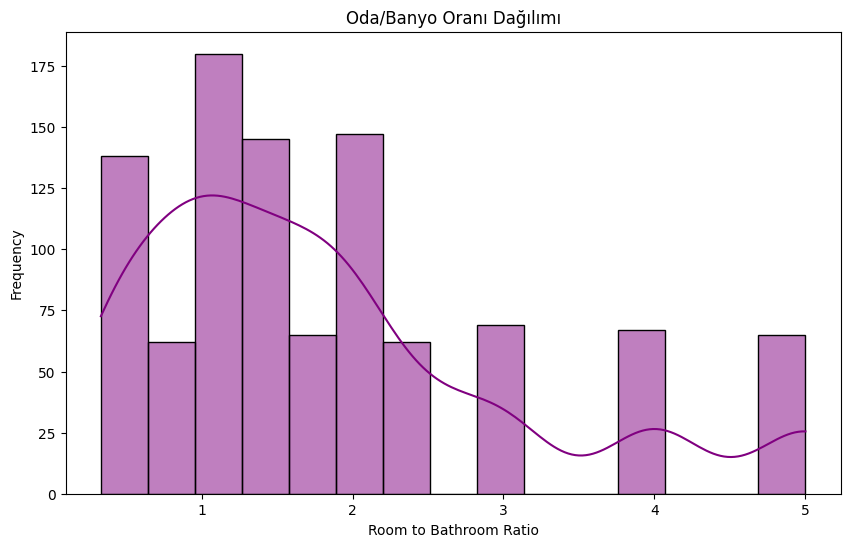

In [198]:
df["Room to Bathroom Ratio"] = df["Bedrooms"] / df["Bathrooms"]

# Görselleştirme: Oda/Banyo Oranı Dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df["Room to Bathroom Ratio"], kde=True, bins=15, color="purple")
plt.title("Oda/Banyo Oranı Dağılımı")
plt.xlabel("Room to Bathroom Ratio")
plt.ylabel("Frequency")
plt.show()


**"Outdoor Feature Index" - Açık Alan Özellik Endeksi**

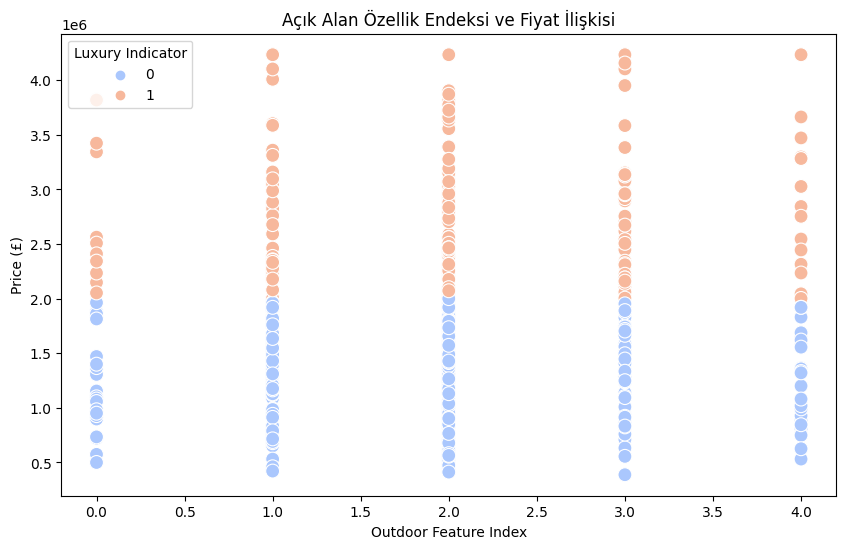

In [199]:
outdoor_features = {
    "Garden": {"Yes": 1, "No": 0},
    "Balcony": {"High-level Balcony": 1, "No Balcony": 0},
    "View": {"Garden": 2, "Park": 1, "City": 1, "Street": 0}
}
df["Outdoor Feature Index"] = (df["Garden"].map(outdoor_features["Garden"]) +
                                 df["Balcony"].map(outdoor_features["Balcony"]) +
                                 df["View"].map(outdoor_features["View"]))

# Görselleştirme: Açık Alan Özellik Endeksi ve Fiyat İlişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Outdoor Feature Index", y="Price (£)", hue="Luxury Indicator", palette="coolwarm", s=100)
plt.title("Açık Alan Özellik Endeksi ve Fiyat İlişkisi")
plt.xlabel("Outdoor Feature Index")
plt.ylabel("Price (£)")
plt.legend(title="Luxury Indicator", loc="upper left")
plt.show()


**"Total Floors per Square Meter" - Kat Başına Metrekare**

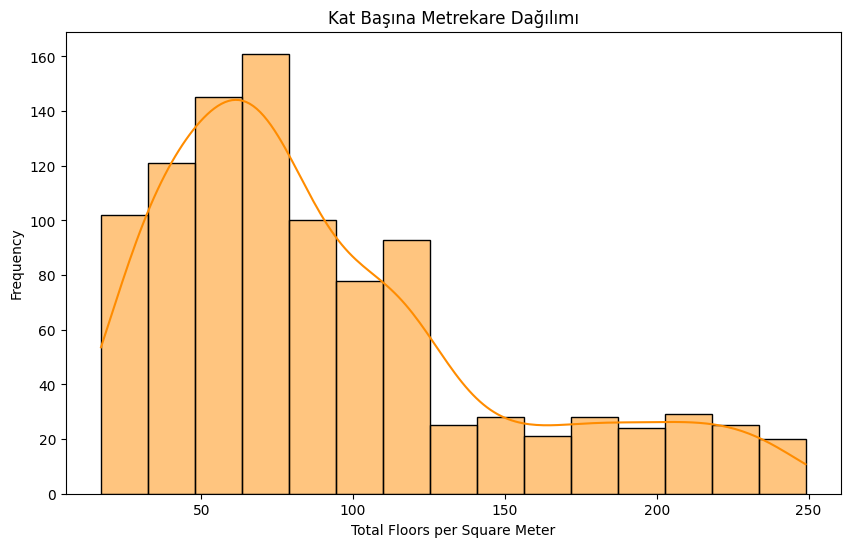

In [200]:
df["Total Floors per Square Meter"] = df["Square Meters"] / df["Floors"]

# Görselleştirme: Kat Başına Metrekare Dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df["Total Floors per Square Meter"], kde=True, bins=15, color="darkorange")
plt.title("Kat Başına Metrekare Dağılımı")
plt.xlabel("Total Floors per Square Meter")
plt.ylabel("Frequency")
plt.show()


**"Heating and Building Quality Interaction" - Isıtma ve Bina Kalitesi Etkileşimi**

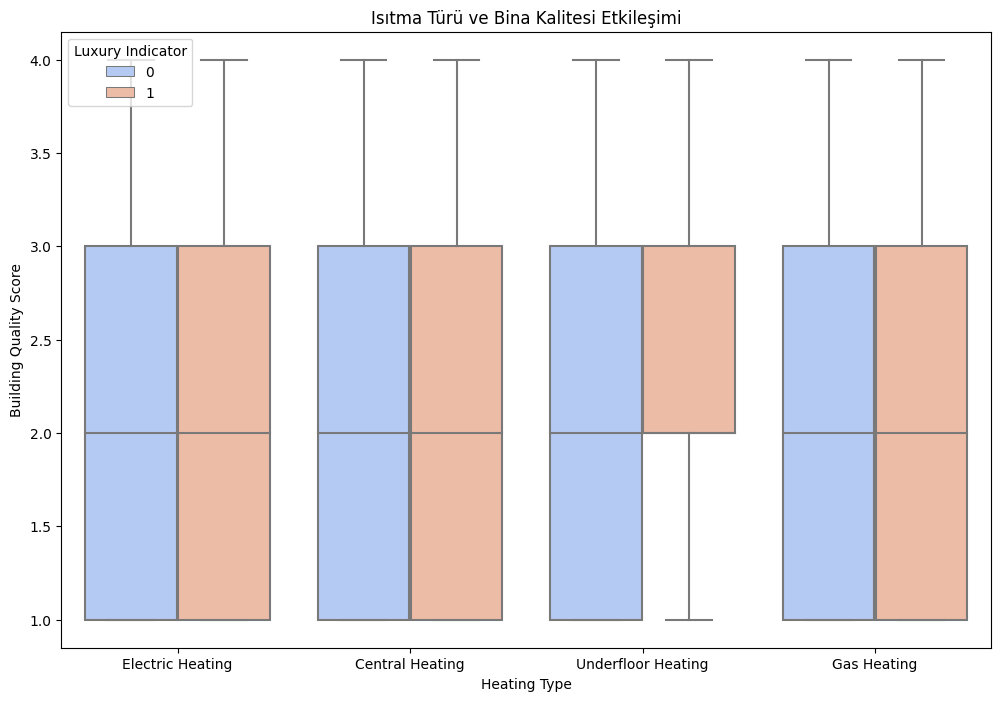

In [201]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Heating Type", y="Building Quality Score", hue="Luxury Indicator", palette="coolwarm")
plt.title("Isıtma Türü ve Bina Kalitesi Etkileşimi")
plt.xlabel("Heating Type")
plt.ylabel("Building Quality Score")
plt.legend(title="Luxury Indicator", loc="upper left")
plt.show()


**"Neighborhood Popularity Score" - Semt Popülerlik Skoru**

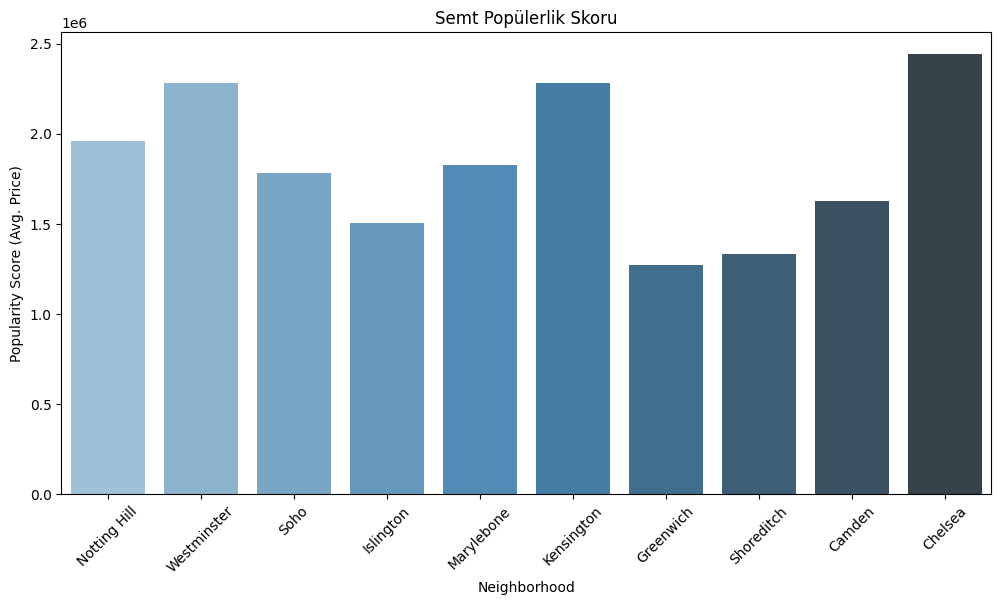

In [202]:
neighborhood_popularity = df.groupby("Neighborhood")["Price (£)"].mean().sort_values(ascending=False)
df["Neighborhood Popularity Score"] = df["Neighborhood"].map(neighborhood_popularity)

# Görselleştirme: Semt Popülerlik Skorunun Dağılımı
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Neighborhood", y="Neighborhood Popularity Score", palette="Blues_d")
plt.title("Semt Popülerlik Skoru")
plt.xticks(rotation=45)
plt.ylabel("Popularity Score (Avg. Price)")
plt.show()


**Numerik değerlerin standartlaştırılması ve kategorik değerlerin nümerik hale getirilmesi**

In [203]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()

df[nums] = scaler.fit_transform(df[nums])



label_encoders = {}
for col in cats:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 



In [204]:
df.to_excel('/kaggle/working/dosya_adi.xlsx', index=False)

# Emlak Verileri Üzerine Analiz Sonuçları

Aşağıdaki analiz sonuçları, verilen emlak verileri setine dayanarak çıkarılmıştır. Bu rapor, özellikle emlak fiyatları, bina kalitesi, dış özellikler ve mahalle popülerliği gibi konularda bilgi sağlamaktadır.

## 1. Metrekare Başına Fiyat (Price per Square Meter)
Metrekare başına fiyat, mülklerin değerini kıyaslamak için kullanılan önemli bir metriktir.

| Mülk Adı             | Fiyat (GBP) | Metrekare Başına Fiyat |
|----------------------|-------------|------------------------|
| 78 Regent Street     | £12,800     | £12,800                |
| 198 Oxford Street    | £12,000     | £12,000                |

Daha yüksek fiyatlar genellikle bina kalitesi, lokasyon popülerliği veya lüks göstergelerle ilişkilidir.

## 2. Lüks Göstergesi (Luxury Indicator)
Lüks özelliklerin bir göstergesi olarak bu değişken, yüksek değere sahip mülklerin tespiti için önemlidir.

| Mülk Adı             | Lüks Göstergesi |
|----------------------|-----------------|
| 78 Regent Street     | 1 (Lüks)        |
| 198 Oxford Street    | 0 (Lüks değil)  |

## 3. Yenileme Yaşı (Renovation Age)
Binaların yenileme yaşları, modernlik ve değer potansiyeli açısından kritik bir rol oynar.

| Mülk Adı             | Yenileme Yaşı  |
|----------------------|----------------|
| 78 Regent Street     | 72 yıl önce     |
| 198 Oxford Street    | Bilgi yok      |

## 4. Bahçe ve Garaj Endeksi (Garden and Garage Index)
Bahçe ve garaj gibi dış özelliklerin varlığı mülk değerini artırabilir.

| Mülk Adı             | Bahçe ve Garaj |
|----------------------|----------------|
| 78 Regent Street     | 0 (Yok)        |
| 198 Oxford Street    | 1 (Bahçe var)  |

## 5. Bina Kalite Puanı (Building Quality Score)
Bu puan, kullanılan malzeme kalitesi ve yapısal durum gibi kriterlere dayanır.

| Mülk Adı             | Bina Kalite Puanı |
|----------------------|-------------------|
| 78 Regent Street     | 4                 |
| 198 Oxford Street    | 1                 |

## 6. Mülk Yaşı Kategorisi (Property Age Category)
Mülklerin yaşı, kategori olarak değerlendirilmiştir:
- **Eski (Old)**: 78 Regent Street
- **Orta Yaşta (Moderate)**: 198 Oxford Street

## 7. Oda/Banyo Oranı (Room to Bathroom Ratio)
Daha fazla banyo genellikle lüks bir gösterge olarak kabul edilir.

| Mülk Adı             | Oda/Banyo Oranı |
|----------------------|-----------------|
| 78 Regent Street     | 0.67            |
| 198 Oxford Street    | 2.0             |

## 8. Dış Özellikler Endeksi (Outdoor Feature Index)
Dış özellikler (bahçe, balkon gibi) bu endeksle değerlendirilmiştir.

| Mülk Adı             | Dış Özellikler Endeksi |
|----------------------|------------------------|
| 78 Regent Street     | 3.0                    |
| 198 Oxford Street    | 3.0                    |

## 9. Mahalle Popülerlik Skoru (Neighborhood Popularity Score)
Bu skor, mahallelerin popülerlik ve prestij seviyesini gösterir.

| Mülk Adı             | Mahalle Popülerlik Skoru |
|----------------------|--------------------------|
| 78 Regent Street     | 1.96 milyon puan         |
| 198 Oxford Street    | 2.28 milyon puan         |

## Sonuç ve Öneriler

- **78 Regent Street** gibi lüks mülkler, daha yüksek fiyatlar talep ederken, modernlik ve yenileme yaşındaki eksiklikler mülk değerini olumsuz etkileyebilir.
- **198 Oxford Street**, orta düzey bir mahallede, dış özelliklerden eksik olsa da uygun fiyatıyla alıcılar için cazip olabilir.

Gelecekteki yatırım için, mahalle popülerliği ve bina kalitesi gibi faktörlere odaklanmak önemli olacaktır.


# MODEL OLUŞTURMA

In [205]:
df1=df.copy()

In [214]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Neighborhood                   1000 non-null   int64  
 1   Bedrooms                       1000 non-null   int64  
 2   Bathrooms                      1000 non-null   int64  
 3   Square Meters                  1000 non-null   float64
 4   Building Age                   1000 non-null   float64
 5   Garden                         1000 non-null   int64  
 6   Garage                         1000 non-null   int64  
 7   Floors                         1000 non-null   int64  
 8   Property Type                  1000 non-null   int64  
 9   Heating Type                   1000 non-null   int64  
 10  Balcony                        1000 non-null   int64  
 11  Interior Style                 1000 non-null   int64  
 12  View                           1000 non-null   in

In [207]:
df1.drop('Address', axis=1,inplace=True)#Adress kolonu  modelimde  herhangi bir işe yaramayacağından  kaldırıyorum 

**Fiyat Tahmini  İçin Lineer Regresyon**

Fiyat ile diğer değişkenler arasındaki korelasyonlar:
Luxury Indicator                 0.828697
Square Meters                    0.792475
Price per Square Meter           0.548810
Total Floors per Square Meter    0.481302
Neighborhood Popularity Score    0.439475
Property Type                    0.149129
Property Age Category            0.094073
Interior Style                   0.087608
Neighborhood                     0.058120
Garage                           0.047728
Outdoor Feature Index            0.041451
Materials                        0.038842
Building Age                     0.033557
Garden and Garage Index          0.027096
Room to Bathroom Ratio           0.023097
Floors                           0.016197
Renovation Age                   0.013341
Building Status                  0.005495
Garden                          -0.009380
Heating Type                    -0.017633
Bedrooms                        -0.018065
Balcony                         -0.020127
Building Quality Score

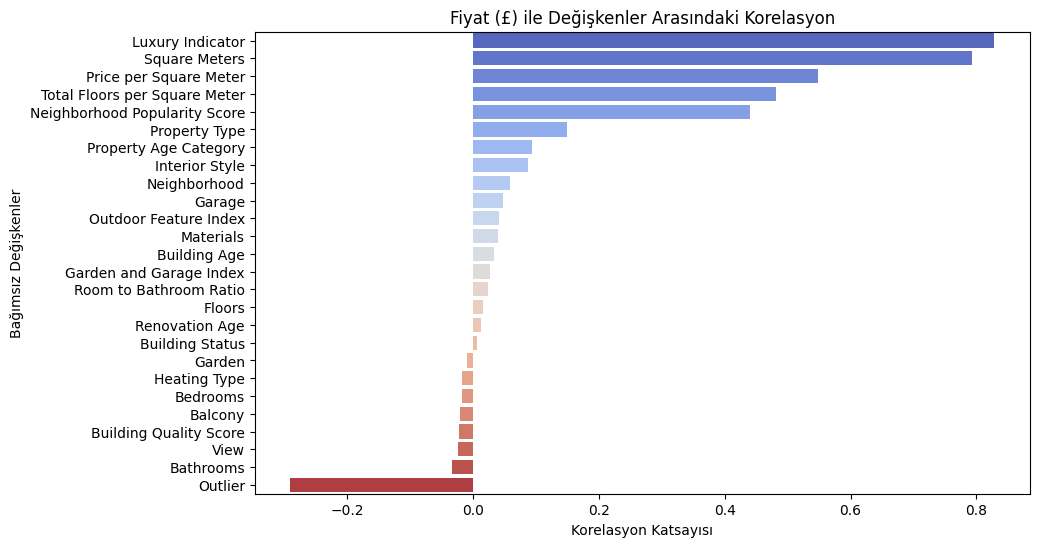

In [216]:
df["Property Age Category"] = df["Property Age Category"].astype("category").cat.codes  # Old=0, Moderate=1, New=2

# 🔹 Korelasyon matrisini hesaplama (sadece sayısal değişkenlerle)
correlation_matrix = df.select_dtypes(include=["number"]).corr()

# 🔹 Fiyat (Price £) ile diğer değişkenler arasındaki korelasyonu sıralama
price_correlation = correlation_matrix["Price (£)"].drop("Price (£)").sort_values(ascending=False)

# 🔹 Korelasyonları yazdırma
print("Fiyat ile diğer değişkenler arasındaki korelasyonlar:")
print(price_correlation)

# 🔹 Korelasyonu görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(x=price_correlation.values, y=price_correlation.index, palette="coolwarm")
plt.xlabel("Korelasyon Katsayısı")
plt.ylabel("Bağımsız Değişkenler")
plt.title("Fiyat (£) ile Değişkenler Arasındaki Korelasyon")
plt.show()

In [235]:

features = ['Luxury Indicator', 'Square Meters', 'Total Floors per Square Meter', 'Neighborhood Popularity Score']
X = df1[features]
y = df1['Price (£)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.14184613936473378


In [233]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Eğitim seti tahminleri ve MSE
y_train_pred = model.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Linear Regression Train MSE: {mse_train}")

# Test seti tahminleri ve MSE
y_test_pred = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Linear Regression Test MSE: {mse_test}")

# R2 Skorları
print(f"Linear Regression Train R2: {r2_score(y_train, y_train_pred)}")
print(f"Linear Regression Test R2: {r2_score(y_test, y_test_pred)}")

Linear Regression Train MSE: 0.11883946789914455
Linear Regression Test MSE: 0.14184613936473378
Linear Regression Train R2: 0.8803948454856295
Linear Regression Test R2: 0.8616950279898232


In [236]:
# 5 Katlı Çapraz Doğrulama (5-Fold Cross Validation)
cv_results = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Çapraz doğrulama sonuçları
mean_cv_mse = np.mean(np.abs(cv_results))  # Negatif MSE'yi pozitif hale getirelim
print(f"Cross-Validation Mean MSE: {mean_cv_mse}")

Cross-Validation Mean MSE: 0.12035182335737218
